<a href="https://colab.research.google.com/github/haneneby/CART/blob/main/kymriah_yaskart_test.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [ ]:
!pip install scanpy
import scanpy as sc
import matplotlib.pyplot as plt
import seaborn as sns
import pandas as pd
import scanpy as sc
import numpy as np
from sklearn.model_selection import train_test_split
# from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import accuracy_score, classification_report
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import accuracy_score, classification_report, confusion_matrix
from sklearn.model_selection import GroupShuffleSplit
from sklearn.neural_network import MLPClassifier


   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 2.1/2.1 MB 23.5 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 144.5/144.5 kB 12.4 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 13.3/13.3 MB 81.8 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 53.1/53.1 kB 4.5 MB/s eta 0:00:00
  Attempting uninstall: scikit-learn
    Found existing installation: scikit-learn 1.6.1
    Uninstalling scikit-learn-1.6.1:
      Successfully uninstalled scikit-learn-1.6.1


In [ ]:
 #! pip uninstall cupy-cuda11x

In [ ]:
# First, make sure you're using the GPU runtime
!nvidia-smi  # Check if GPU is available

# Install RAPIDS cuML for the compatible version of Colab's CUDA (Colab uses CUDA 11.2)
# !pip install cuml-cu11

Thu Apr  3 19:50:38 2025       
+-----------------------------------------------------------------------------------------+
| NVIDIA-SMI 550.54.15              Driver Version: 550.54.15      CUDA Version: 12.4     |
|-----------------------------------------+------------------------+----------------------+
| GPU  Name                 Persistence-M | Bus-Id          Disp.A | Volatile Uncorr. ECC |
| Fan  Temp   Perf          Pwr:Usage/Cap |           Memory-Usage | GPU-Util  Compute M. |
|                                         |                        |               MIG M. |
|=========================================+========================+======================|
|   0  Tesla T4                       Off |   00000000:00:04.0 Off |                    0 |
| N/A   68C    P8             10W /   70W |       0MiB /  15360MiB |      0%      Default |
|                                         |                        |                  N/A |
+-----------------------------------------+-----

In [ ]:
import gdown

file_id = "1g4cisf8adngsojoBb7fz8wGgP630_1o5"  # Extracted from your link
output_file = "CART_fulldataset_clustered.h5ad"

# Download the file
gdown.download(f"https://drive.google.com/uc?id={file_id}", output_file, quiet=False)


Downloading...
From (original): https://drive.google.com/uc?id=1g4cisf8adngsojoBb7fz8wGgP630_1o5
From (redirected): https://drive.google.com/uc?id=1g4cisf8adngsojoBb7fz8wGgP630_1o5&confirm=t&uuid=9eb85db7-cc75-40f6-9652-65137e79af6a
To: /content/CART_fulldataset_clustered.h5ad
100%|██████████| 16.2G/16.2G [02:58<00:00, 90.4MB/s]


'CART_fulldataset_clustered.h5ad'

In [ ]:
# Load the .h5ad file
adata = sc.read_h5ad(output_file, backed="r")

# Print dataset info
print(adata)

AnnData object with n_obs × n_vars = 382983 × 5072 backed at 'CART_fulldataset_clustered.h5ad'
    obs: 'channel', 'barcode', 'timepoint', 'timepoint_fine', 'product', 'generic', 'batch', 'nTisa', 'nAxi', 'CAR', 'n_genes_by_counts', 'total_counts', 'pct_counts_mt', 'response', 'cdr3_TRA', 'cdr3_TRB', 'leiden_1.0', 'leiden_1.5', 'leiden_2.0', 'cell_type', 'CD45RO', 'CD45RA', 'subtype', 'type'
    var: 'gene_ids', 'feature_types', 'genome', 'n_cells_by_counts', 'mean_counts', 'pct_dropout_by_counts', 'total_counts', 'n_cells', 'mt', 'highly_variable', 'means', 'dispersions', 'dispersions_norm', 'mean', 'std'
    uns: 'batch_colors', 'cell_type_colors', 'hvg', 'leiden', 'leiden_1.0_colors', 'leiden_1.5_colors', 'leiden_2.0_colors', 'neighbors', 'patient_colors', 'pca', 'product_colors', 'rank_genes_groups', 'response_colors', 'timepoint_colors', 'umap'
    obsm: 'X_pca', 'X_pca_harmony', 'X_pca_harmony_sub', 'X_umap'
    varm: 'PCs'
    layers: 'umi'
    obsp: 'connectivities', 'distances

In [ ]:

adata_kymriah_baseline = adata[ (adata.obs['product'] == 'Yescarta') & (adata.obs['type'] == 'Baseline'), : ]

print(adata_kymriah_baseline.shape)
print(adata_kymriah_baseline.obs['response'].unique())
# Print unique channels
unique_channels = adata_kymriah_baseline.obs['barcode'].unique()
print("Unique channels:", unique_channels)
# Count the number of patients per response category
patient_counts = adata_kymriah_baseline.obs.groupby('response')['barcode'].nunique()

# Print the count of patients per response category
print(patient_counts)
# Group by 'response' and print unique patients (channels) for each response category
patients_per_response = adata_kymriah_baseline.obs.groupby('response')['barcode'].unique()

# Print patients per response category
print("======patients_per_response", patients_per_response[0].to_list())
print("======patients_per_response", patients_per_response[1].to_list())


(17258, 5072)
['R', 'NR']
Categories (2, object): ['NR', 'R']
Unique channels: ['Axi-R-17', 'Axi-R-15', 'Axi-R-13', 'Axi-R-19', 'Axi-R-08', ..., 'Axi-N-10', 'Axi-N-06', 'Axi-N-18', 'Axi-R-12', 'Axi-N-14']
Length: 12
Categories (12, object): ['Axi-R-12', 'Axi-N-14', 'Axi-N-09', 'Axi-R-08', ..., 'Axi-N-18', 'Axi-R-13',
                          'Axi-N-10', 'Axi-R-11']
response
NR    5
R     7
Name: barcode, dtype: int64
======patients_per_response ['Axi-N-09', 'Axi-N-10', 'Axi-N-06', 'Axi-N-18', 'Axi-N-14']
======patients_per_response ['Axi-R-17', 'Axi-R-15', 'Axi-R-13', 'Axi-R-19', 'Axi-R-08', 'Axi-R-11', 'Axi-R-12']


<ipython-input-17-7a3a654ab351>:9: FutureWarning: The default of observed=False is deprecated and will be changed to True in a future version of pandas. Pass observed=False to retain current behavior or observed=True to adopt the future default and silence this warning.
  patient_counts = adata_kymriah_baseline.obs.groupby('response')['barcode'].nunique()
<ipython-input-17-7a3a654ab351>:14: FutureWarning: The default of observed=False is deprecated and will be changed to True in a future version of pandas. Pass observed=False to retain current behavior or observed=True to adopt the future default and silence this warning.
  patients_per_response = adata_kymriah_baseline.obs.groupby('response')['barcode'].unique()
<ipython-input-17-7a3a654ab351>:17: FutureWarning: Series.__getitem__ treating keys as positions is deprecated. In a future version, integer keys will always be treated as labels (consistent with DataFrame behavior). To access a value by position, use `ser.iloc[pos]`
  print("

In [ ]:
!nvcc --version
# # Install cuML and other RAPIDS libraries in Google Colab
# !pip install cuml-cu12

# !pip install cupy-cuda11  # For CUDA 11.x
import torch
print(torch.cuda.is_available())  # Should return True if CUDA is available


nvcc: NVIDIA (R) Cuda compiler driver
Copyright (c) 2005-2024 NVIDIA Corporation
Built on Thu_Jun__6_02:18:23_PDT_2024
Cuda compilation tools, release 12.5, V12.5.82
Build cuda_12.5.r12.5/compiler.34385749_0
True


In [ ]:
# Uninstall any existing cudf, cuml, and cupy installations
# !pip uninstall -y cudf cuml cupy

# # Install cuDF and cuML for CUDA 12.x
# !pip install cuml-cu12
# !pip install cudf-cu12
# !pip install --upgrade --no-cache-dir cuml-cu12 cupy-cuda12x


<ipython-input-155-5f2b3106387e>:28: FutureWarning: The default of observed=False is deprecated and will be changed to True in a future version of pandas. Pass observed=False to retain current behavior or observed=True to adopt the future default and silence this warning.
  mean_expr_baseline = baseline_expression.groupby(adata_kymriah_Baseline.obs["response"]).mean()
<ipython-input-155-5f2b3106387e>:29: FutureWarning: The default of observed=False is deprecated and will be changed to True in a future version of pandas. Pass observed=False to retain current behavior or observed=True to adopt the future default and silence this warning.
  mean_expr_infusion = infusion_expression.groupby(adata_kymriah_Infusion.obs["response"]).mean()
<ipython-input-155-5f2b3106387e>:30: FutureWarning: The default of observed=False is deprecated and will be changed to True in a future version of pandas. Pass observed=False to retain current behavior or observed=True to adopt the future default and silence

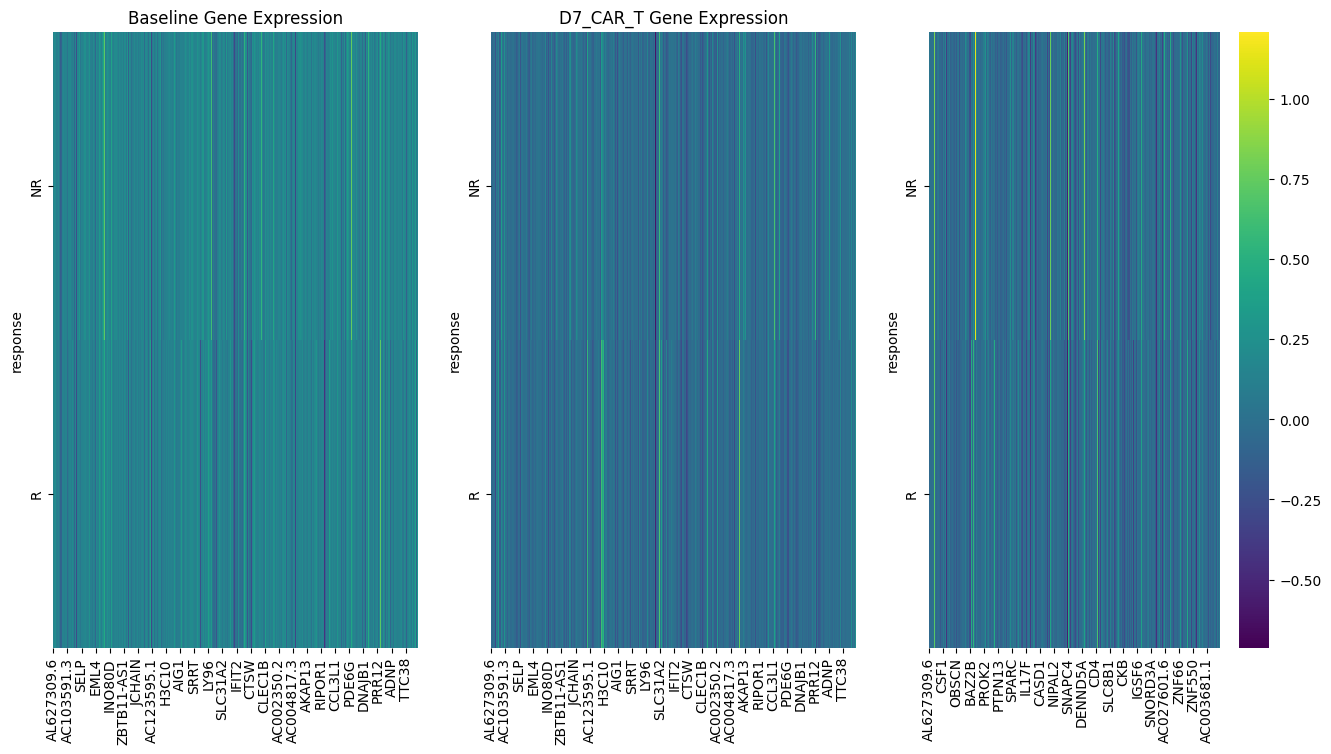

In [ ]:
import seaborn as sns
import matplotlib.pyplot as plt



adata_kymriah_Infusion = adata[ (adata.obs['product'] == 'Kymriah') & (adata.obs['type'] == 'Infusion'), : ]
adata_kymriah_Baseline= adata[ (adata.obs['product'] == 'Kymriah') & (adata.obs['type'] == 'Baseline'), : ]
adata_kymriah_D7_CAR_T = adata[ (adata.obs['product'] == 'Kymriah') & (adata.obs['type'] == 'D7-CAR-T'), : ]

# Extract scaled expression data for each condition
baseline_expression = pd.DataFrame(
    adata_kymriah_Baseline.X,
    columns=adata_kymriah_Baseline.var_names,
    index=adata_kymriah_Baseline.obs.index
)

infusion_expression = pd.DataFrame(
    adata_kymriah_Infusion.X,
    columns=adata_kymriah_Infusion.var_names,
    index=adata_kymriah_Infusion.obs.index
)
D7_CAR_T_expression = pd.DataFrame(
    adata_kymriah_D7_CAR_T.X,
    columns=adata_kymriah_D7_CAR_T.var_names,
    index=adata_kymriah_D7_CAR_T.obs.index
)
# Compute mean expression per response category
mean_expr_baseline = baseline_expression.groupby(adata_kymriah_Baseline.obs["response"]).mean()
mean_expr_infusion = infusion_expression.groupby(adata_kymriah_Infusion.obs["response"]).mean()
mean_expr_D7_CAR_T = D7_CAR_T_expression.groupby(adata_kymriah_D7_CAR_T.obs["response"]).mean()

# Plot side-by-side heatmaps
fig, axes = plt.subplots(1, 3, figsize=(16, 8))

sns.heatmap(mean_expr_baseline, cmap="bwr", ax=axes[0], cbar=False)
axes[0].set_title("Baseline Gene Expression")

sns.heatmap(mean_expr_infusion, cmap="bwr", ax=axes[1], cbar=False)
axes[1].set_title("Infusion Gene Expression")

sns.heatmap(mean_expr_D7_CAR_T, cmap="bwr", ax=axes[2])
axes[1].set_title("D7_CAR_T Gene Expression")

plt.show()


<ipython-input-8-16c181c8bbd3>:28: FutureWarning: The default of observed=False is deprecated and will be changed to True in a future version of pandas. Pass observed=False to retain current behavior or observed=True to adopt the future default and silence this warning.
  mean_expr_baseline = baseline_expression.groupby(adata_Yescarta_Baseline.obs["response"]).mean()
<ipython-input-8-16c181c8bbd3>:29: FutureWarning: The default of observed=False is deprecated and will be changed to True in a future version of pandas. Pass observed=False to retain current behavior or observed=True to adopt the future default and silence this warning.
  mean_expr_infusion = infusion_expression.groupby(adata_Yescarta_Infusion.obs["response"]).mean()
<ipython-input-8-16c181c8bbd3>:30: FutureWarning: The default of observed=False is deprecated and will be changed to True in a future version of pandas. Pass observed=False to retain current behavior or observed=True to adopt the future default and silence thi

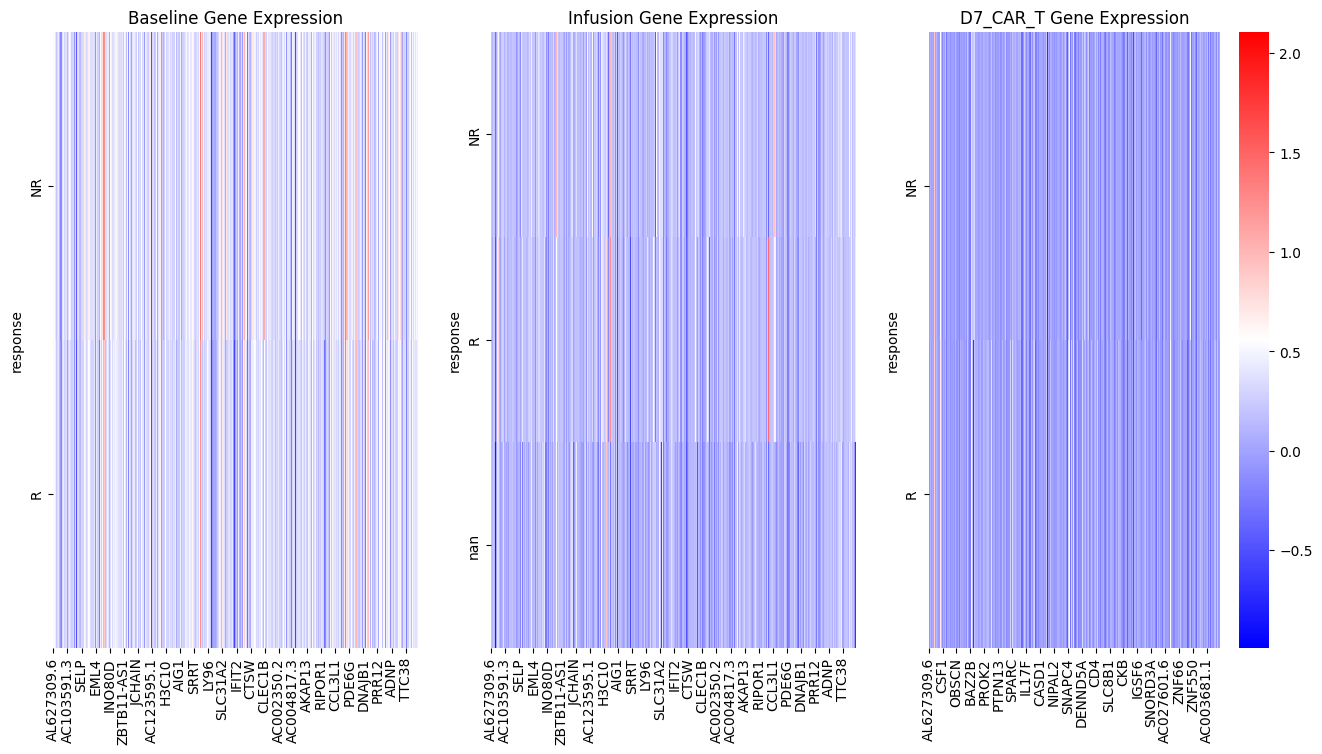

In [ ]:
import seaborn as sns
import matplotlib.pyplot as plt



adata_Yescarta_Infusion = adata[ (adata.obs['product'] == 'Yescarta') & (adata.obs['type'] == 'Infusion'), : ]
adata_Yescarta_Baseline= adata[ (adata.obs['product'] == 'Yescarta') & (adata.obs['type'] == 'Baseline'), : ]
adata_Yescarta_D7_CAR_T = adata[ (adata.obs['product'] == 'Yescarta') & (adata.obs['type'] == 'D7-CAR-T'), : ]

# Extract scaled expression data for each condition
baseline_expression = pd.DataFrame(
    adata_Yescarta_Baseline.X,
    columns=adata_Yescarta_Baseline.var_names,
    index=adata_Yescarta_Baseline.obs.index
)

infusion_expression = pd.DataFrame(
    adata_Yescarta_Infusion.X,
    columns=adata_Yescarta_Infusion.var_names,
    index=adata_Yescarta_Infusion.obs.index
)
D7_CAR_T_expression = pd.DataFrame(
    adata_Yescarta_D7_CAR_T.X,
    columns=adata_Yescarta_D7_CAR_T.var_names,
    index=adata_Yescarta_D7_CAR_T.obs.index
)
# Compute mean expression per response category
mean_expr_baseline = baseline_expression.groupby(adata_Yescarta_Baseline.obs["response"]).mean()
mean_expr_infusion = infusion_expression.groupby(adata_Yescarta_Infusion.obs["response"]).mean()
mean_expr_D7_CAR_T = D7_CAR_T_expression.groupby(adata_Yescarta_D7_CAR_T.obs["response"]).mean()

# Plot side-by-side heatmaps
fig, axes = plt.subplots(1, 3, figsize=(16, 8))

sns.heatmap(mean_expr_baseline, cmap="bwr", ax=axes[0], cbar=False)
axes[0].set_title("Baseline Gene Expression")

sns.heatmap(mean_expr_infusion, cmap="bwr", ax=axes[1], cbar=False)
axes[1].set_title("Infusion Gene Expression")

sns.heatmap(mean_expr_D7_CAR_T, cmap="bwr", ax=axes[2])
axes[2].set_title("D7_CAR_T Gene Expression")

plt.show()


In [ ]:
# import numpy as np


# # Compute log2 fold change
# log2_fold_change = np.log2(mean_expr_infusion + 1) - np.log2(mean_expr_baseline + 1)

# # Compute p-values (this is a placeholder, replace with actual statistical test)
# p_values = np.random.rand(len(log2_fold_change))  # Replace with real p-values
# neg_log_p_values = -np.log10(p_values)

# print(f"log2_fold_change shape: {log2_fold_change.shape}")
# print(f"neg_log_p_values shape: {neg_log_p_values.shape}")

# # Convert to DataFrame and drop any NaN values
# log2_fold_change = np.log2(mean_expr_infusion + 1) - np.log2(mean_expr_baseline + 1)
# log2_fold_change = log2_fold_change.dropna()

# # Generate corresponding p-values (use statistical tests in real cases)
# p_values = np.random.rand(len(log2_fold_change))  # Placeholder for actual p-values
# neg_log_p_values = -np.log10(p_values)

# # Ensure lengths match
# assert len(log2_fold_change) == len(neg_log_p_values), "Mismatch in array sizes!"

# plt.figure(figsize=(10, 6))
# plt.scatter(log2_fold_change, neg_log_p_values, c=(neg_log_p_values > 2), cmap="coolwarm", alpha=0.7)

# plt.axhline(y=2, linestyle="--", color="gray")  # p-value threshold
# plt.axvline(x=1, linestyle="--", color="gray")  # Fold change threshold
# plt.axvline(x=-1, linestyle="--", color="gray")

# plt.xlabel("Log2 Fold Change")
# plt.ylabel("-Log10 P-value")
# plt.title("Volcano Plot: Baseline vs. Infusion Gene Expression")
# plt.show()





# # # Create the volcano plot
# # plt.figure(figsize=(10, 6))
# # plt.scatter(log2_fold_change, neg_log_p_values, c=(neg_log_p_values > 2), cmap="coolwarm", alpha=0.7)

# # plt.axhline(y=2, linestyle="--", color="gray")  # p-value threshold
# # plt.axvline(x=1, linestyle="--", color="gray")  # Fold change threshold
# # plt.axvline(x=-1, linestyle="--", color="gray")

# # plt.xlabel("Log2 Fold Change")
# # plt.ylabel("-Log10 P-value")
# # plt.title("Volcano Plot: Baseline vs. Infusion Gene Expression")

# # plt.show()


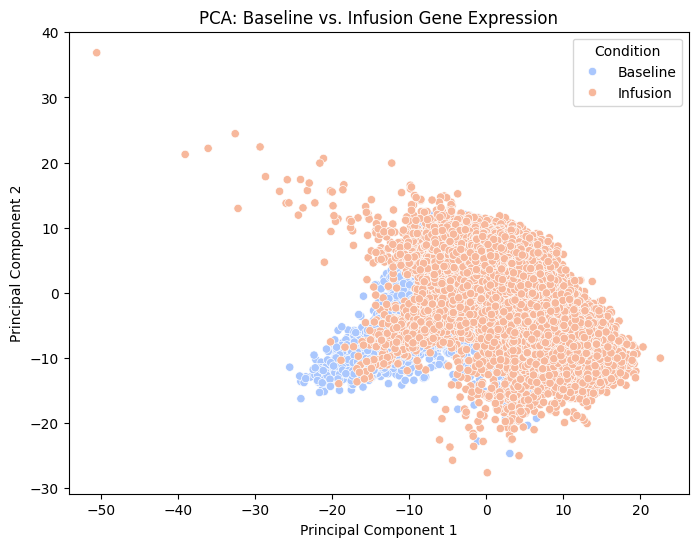

In [ ]:
from sklearn.decomposition import PCA

# Concatenate expression matrices
all_expression = pd.concat([baseline_expression, infusion_expression])

# Perform PCA
pca = PCA(n_components=2)
pca_result = pca.fit_transform(all_expression)

# Create DataFrame for plotting
pca_df = pd.DataFrame(pca_result, columns=["PC1", "PC2"])
pca_df["Condition"] = ["Baseline"] * len(baseline_expression) + ["Infusion"] * len(infusion_expression)

# Scatter plot of PCA
plt.figure(figsize=(8, 6))
sns.scatterplot(data=pca_df, x="PC1", y="PC2", hue="Condition", palette="coolwarm")
plt.xlabel("Principal Component 1")
plt.ylabel("Principal Component 2")
plt.title("PCA: Baseline vs. Infusion Gene Expression")
plt.show()


In [ ]:
# Filter using query for 'Kymriah' product and 'Baseline' type
# adata_kymriah_Infusion = adata[adata.obs.query("product == 'Kymriah' and type == 'Infusion'").index, :]
# adata_kymriah_Baseline = adata[adata.obs.query("product == 'Kymriah' and type == 'Baseline'").index, :]
# adata_Yescarta_Baseline = adata[adata.obs.query("product == 'Yescarta' and type == 'Baseline'").index, :]
adata_Baseline = adata[adata.obs.query("timepoint == 'Baseline'").index, :]


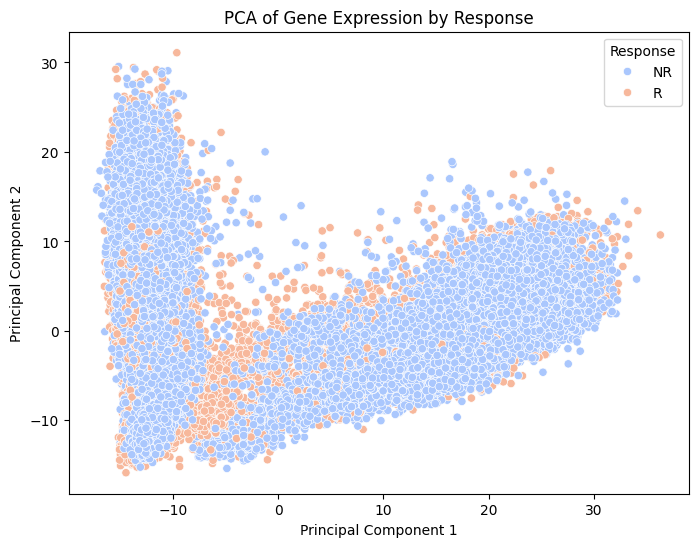

In [ ]:
from sklearn.decomposition import PCA
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
adata_Baseline= adata_Baseline.to_memory()
# Ensure data is in memory
adata_Baseline.X = adata_Baseline.X.toarray() if hasattr(adata_Baseline.X, "toarray") else adata_Baseline.X

# Perform PCA
pca = PCA(n_components=2)
pca_result = pca.fit_transform(adata_Baseline.X)

# Create DataFrame for plotting
pca_df = pd.DataFrame(pca_result, columns=["PC1", "PC2"])
pca_df["Response"] = adata_Baseline.obs["response"].values  # Ensure response labels are included

# Scatter plot of PCA
plt.figure(figsize=(8, 6))
sns.scatterplot(data=pca_df, x="PC1", y="PC2", hue="Response", palette="coolwarm")
plt.xlabel("Principal Component 1")
plt.ylabel("Principal Component 2")
plt.title("PCA of Gene Expression by Response")
plt.show()


In [ ]:
# from cuml.linear_model import LogisticRegression as cuLogisticRegression


Using GPU for training
Epoch [20/1000], Loss: 0.3461
Epoch [40/1000], Loss: 0.2250
Epoch [60/1000], Loss: 0.1864
Epoch [80/1000], Loss: 0.1778
Epoch [100/1000], Loss: 0.1749
Epoch [120/1000], Loss: 0.1734
Epoch [140/1000], Loss: 0.1723
Epoch [160/1000], Loss: 0.1716
Epoch [180/1000], Loss: 0.1710
Epoch [200/1000], Loss: 0.1706
Epoch [220/1000], Loss: 0.1702
Epoch [240/1000], Loss: 0.1699
Epoch [260/1000], Loss: 0.1697
Epoch [280/1000], Loss: 0.1695
Epoch [300/1000], Loss: 0.1693
Epoch [320/1000], Loss: 0.1692
Epoch [340/1000], Loss: 0.1690
Epoch [360/1000], Loss: 0.1689
Epoch [380/1000], Loss: 0.1689
Epoch [400/1000], Loss: 0.1688
Epoch [420/1000], Loss: 0.1687
Epoch [440/1000], Loss: 0.1687
Epoch [460/1000], Loss: 0.1686
Epoch [480/1000], Loss: 0.1686
Epoch [500/1000], Loss: 0.1685
Epoch [520/1000], Loss: 0.1685
Epoch [540/1000], Loss: 0.1684
Epoch [560/1000], Loss: 0.1684
Epoch [580/1000], Loss: 0.1684
Epoch [600/1000], Loss: 0.1684
Epoch [620/1000], Loss: 0.1684
Epoch [640/1000], Lo

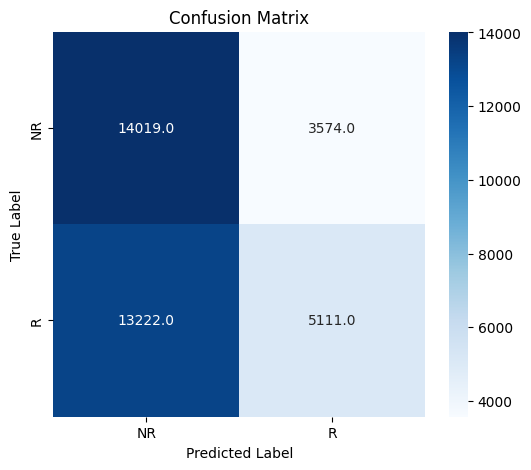

<ipython-input-14-290972be6609>:110: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(x=label_encoder.classes_, y=class_accuracy, palette="Blues")


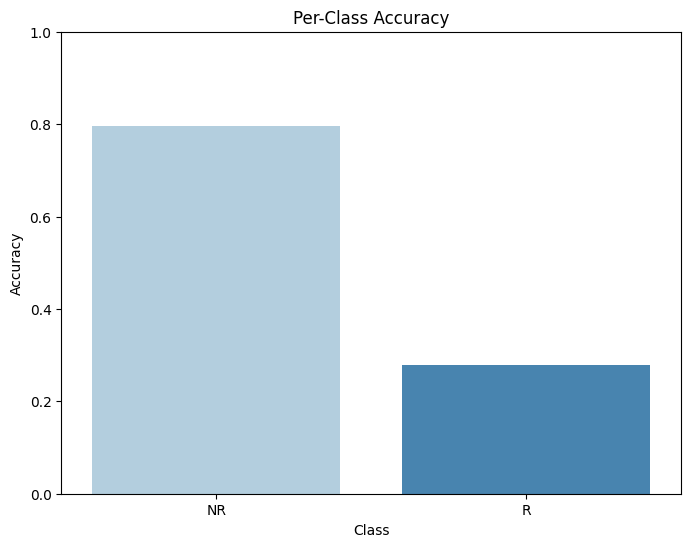

In [ ]:
import torch
from sklearn.model_selection import GroupShuffleSplit
import numpy as np
from sklearn.metrics import accuracy_score, classification_report, confusion_matrix
from sklearn.preprocessing import LabelEncoder
import matplotlib.pyplot as plt
import seaborn as sns


adata_sub= adata_Baseline
# Check if GPU is available with PyTorch
gpu_available = torch.cuda.is_available()

# Extract features (gene expression matrix) and labels (response)
X = adata_sub.X  # Cell features (gene expression matrix)
y = adata_sub.obs['response'].astype(str)  # Convert response to string if categorical

# Convert categorical labels to numeric using LabelEncoder
label_encoder = LabelEncoder()
y = label_encoder.fit_transform(y)  # Convert to numeric labels

# Get the patient ID from the `obs` (assuming patient info is in the 'barcode' column)
patient_ids = adata_sub.obs['barcode']  # Replace with the actual column name if different

# Initialize GroupShuffleSplit
gss = GroupShuffleSplit(n_splits=1, test_size=0.4, random_state=42)

# Split data into train and test sets while keeping the same patient in either train or test
for train_idx, test_idx in gss.split(X, y, groups=patient_ids):
    X_train, X_test = X[train_idx], X[test_idx]
    y_train, y_test = y[train_idx], y[test_idx]

# Convert numpy arrays to PyTorch tensors
X_train_tensor = torch.tensor(X_train, dtype=torch.float32)
X_test_tensor = torch.tensor(X_test, dtype=torch.float32)
y_train_tensor = torch.tensor(y_train, dtype=torch.long)  # for classification task
y_test_tensor = torch.tensor(y_test, dtype=torch.long)

# If GPU is available, move the tensors to GPU
if gpu_available:
    device = torch.device("cuda")
    print("Using GPU for training")
    X_train_tensor = X_train_tensor.to(device)
    X_test_tensor = X_test_tensor.to(device)
    y_train_tensor = y_train_tensor.to(device)
    y_test_tensor = y_test_tensor.to(device)
else:
    device = torch.device("cpu")
    print("Using CPU for training")

# Define the logistic regression model in PyTorch
class LogisticRegressionModel(torch.nn.Module):
    def __init__(self, input_dim):
        super(LogisticRegressionModel, self).__init__()
        self.fc = torch.nn.Linear(input_dim, 2)  # 2 output classes (binary classification)

    def forward(self, x):
        return self.fc(x)

# Initialize the model
model = LogisticRegressionModel(X_train_tensor.shape[1]).to(device)

# Define loss function and optimizer
criterion = torch.nn.CrossEntropyLoss()  # For multi-class classification
optimizer = torch.optim.Adam(model.parameters(), lr=0.01)

# Train the model
num_epochs = 1000 #20
for epoch in range(num_epochs):
    model.train()
    optimizer.zero_grad()
    outputs = model(X_train_tensor)
    loss = criterion(outputs, y_train_tensor)
    loss.backward()
    optimizer.step()

    if (epoch + 1) % 20 == 0:  # Print loss every 2 epochs
        print(f"Epoch [{epoch+1}/{num_epochs}], Loss: {loss.item():.4f}")

# Evaluate the model on the test set
model.eval()
with torch.no_grad():
    outputs = model(X_test_tensor)
    _, predicted = torch.max(outputs, 1)

# Convert predictions and true labels back to numpy arrays for evaluation
y_pred = predicted.cpu().numpy()  # Move predictions to CPU for evaluation
y_true = y_test_tensor.cpu().numpy()  # Same for true labels

# Print accuracy and classification report
print("Accuracy:", accuracy_score(y_true, y_pred))
print(classification_report(y_true, y_pred, target_names=label_encoder.classes_))

# Confusion matrix
conf_matrix = confusion_matrix(y_true, y_pred)

# Plot Final Confusion Matrix
plt.figure(figsize=(6, 5))
sns.heatmap(conf_matrix, annot=True, fmt=".1f", cmap="Blues",
            xticklabels=label_encoder.classes_, yticklabels=label_encoder.classes_)
plt.xlabel("Predicted Label")
plt.ylabel("True Label")
plt.title("Confusion Matrix")
plt.show()
# Per-class accuracy: Correct predictions / Total actual instances
class_accuracy = np.diag(conf_matrix) / conf_matrix.sum(axis=1)

# Plot per-class accuracy
plt.figure(figsize=(8, 6))
sns.barplot(x=label_encoder.classes_, y=class_accuracy, palette="Blues")
plt.ylim(0, 1)  # Accuracy is between 0 and 1
plt.ylabel("Accuracy")
plt.xlabel("Class")
plt.title("Per-Class Accuracy")
plt.show()



Patient-level Accuracy: 0.625
Patient-level Classification Report:
              precision    recall  f1-score   support

          NR       0.57      1.00      0.73         4
           R       1.00      0.25      0.40         4

    accuracy                           0.62         8
   macro avg       0.79      0.62      0.56         8
weighted avg       0.79      0.62      0.56         8



<ipython-input-15-43f4e11416e6>:108: FutureWarning: The default of observed=False is deprecated and will be changed to True in a future version of pandas. Pass observed=False to retain current behavior or observed=True to adopt the future default and silence this warning.
  channel_predictions = test_df.groupby('barcode').agg({'pred_label': majority_vote, 'true_label': 'first'}).dropna()


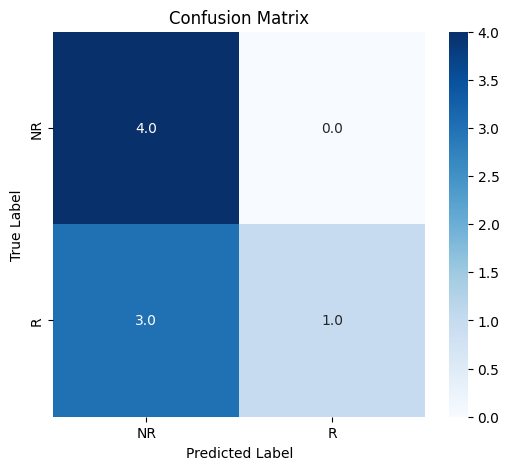

<ipython-input-15-43f4e11416e6>:138: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(x=label_encoder.classes_, y=class_accuracy, palette="Blues")


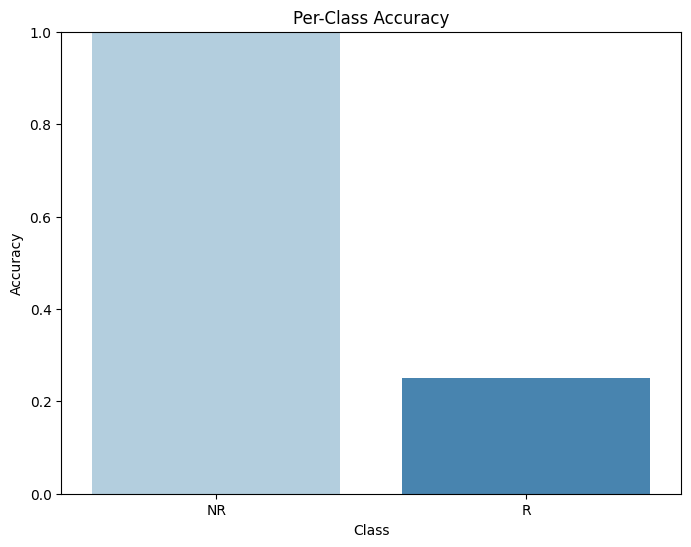

In [ ]:
import torch
from sklearn.model_selection import GroupShuffleSplit
import numpy as np
from sklearn.metrics import accuracy_score, classification_report, confusion_matrix
from sklearn.preprocessing import LabelEncoder
import matplotlib.pyplot as plt
import seaborn as sns


# adata_sub= adata_Yescarta_Baseline

# # Check if GPU is available with PyTorch
# gpu_available = torch.cuda.is_available()

# # Extract features (gene expression matrix) and labels (response)
# X = adata_sub.X  # Cell features (gene expression matrix)
# y = adata_sub.obs['response'].astype(str)  # Convert response to string if categorical

# # Convert categorical labels to numeric using LabelEncoder
# label_encoder = LabelEncoder()
# y = label_encoder.fit_transform(y)  # Convert to numeric labels

# # Get the patient ID from the `obs` (assuming patient info is in the 'barcode' column)
patient_ids = adata_sub.obs['barcode']  # Replace with the actual column name if different

# # Initialize GroupShuffleSplit
# gss = GroupShuffleSplit(n_splits=1, test_size=0.4, random_state=42)

# # Split data into train and test sets while keeping the same patient in either train or test
# for train_idx, test_idx in gss.split(X, y, groups=patient_ids):
#     X_train, X_test = X[train_idx], X[test_idx]
#     y_train, y_test = y[train_idx], y[test_idx]

# # Convert numpy arrays to PyTorch tensors
# X_train_tensor = torch.tensor(X_train, dtype=torch.float32)
# X_test_tensor = torch.tensor(X_test, dtype=torch.float32)
# y_train_tensor = torch.tensor(y_train, dtype=torch.long)  # for classification task
# y_test_tensor = torch.tensor(y_test, dtype=torch.long)

# # If GPU is available, move the tensors to GPU
# if gpu_available:
#     device = torch.device("cuda")
#     print("Using GPU for training")
#     X_train_tensor = X_train_tensor.to(device)
#     X_test_tensor = X_test_tensor.to(device)
#     y_train_tensor = y_train_tensor.to(device)
#     y_test_tensor = y_test_tensor.to(device)
# else:
#     device = torch.device("cpu")
#     print("Using CPU for training")

# # Define the logistic regression model in PyTorch
# class LogisticRegressionModel(torch.nn.Module):
#     def __init__(self, input_dim):
#         super(LogisticRegressionModel, self).__init__()
#         self.fc = torch.nn.Linear(input_dim, 2)  # 2 output classes (binary classification)

#     def forward(self, x):
#         return self.fc(x)

# # Initialize the model
# model = LogisticRegressionModel(X_train_tensor.shape[1]).to(device)

# # Define loss function and optimizer
# criterion = torch.nn.CrossEntropyLoss()  # For multi-class classification
# optimizer = torch.optim.Adam(model.parameters(), lr=0.001)

# # Train the model
# num_epochs = 150#20
# for epoch in range(num_epochs):
#     model.train()
#     optimizer.zero_grad()
#     outputs = model(X_train_tensor)
#     loss = criterion(outputs, y_train_tensor)
#     loss.backward()
#     optimizer.step()

#     if (epoch + 1) % 2 == 0:  # Print loss every 2 epochs
#         print(f"Epoch [{epoch+1}/{num_epochs}], Loss: {loss.item():.4f}")

# # Evaluate the model on the test set
# model.eval()
# with torch.no_grad():
#     outputs = model(X_test_tensor)
#     _, predicted = torch.max(outputs, 1)

# # Convert predictions and true labels back to numpy arrays for evaluation
# y_pred = predicted.cpu().numpy()  # Move predictions to CPU for evaluation
# y_true = y_test_tensor.cpu().numpy()  # Same for true labels

# **Aggregate Predictions per Patient using Majority Vote**
import pandas as pd

# Prepare DataFrame for predictions and true labels per cell
test_df = pd.DataFrame({
    'barcode': patient_ids.iloc[test_idx].values,  # Match patient IDs for test set
    'true_label': y_true,
    'pred_label': y_pred
})

# Majority vote function for each patient
def majority_vote(series):
    if series.empty:
        return np.nan  # Handle empty sequences gracefully
    return series.value_counts().idxmax()  # Get the most frequent label

# Perform majority vote per patient (ignore empty patients)
channel_predictions = test_df.groupby('barcode').agg({'pred_label': majority_vote, 'true_label': 'first'}).dropna()

# Extract final labels per patient
y_true_channel = channel_predictions['true_label']
y_pred_channel = channel_predictions['pred_label']

# Compute accuracy at patient level
print("Patient-level Accuracy:", accuracy_score(y_true_channel, y_pred_channel))

# Compute classification report at patient level
print("Patient-level Classification Report:")
print(classification_report(y_true_channel, y_pred_channel, target_names=label_encoder.classes_))

# Confusion matrix at patient level
conf_matrix = confusion_matrix(y_true_channel, y_pred_channel)

# Plot Final Confusion Matrix
plt.figure(figsize=(6, 5))
sns.heatmap(conf_matrix, annot=True, fmt=".1f", cmap="Blues",
            xticklabels=label_encoder.classes_, yticklabels=label_encoder.classes_)
plt.xlabel("Predicted Label")
plt.ylabel("True Label")
plt.title("Confusion Matrix")
plt.show()

# Per-class accuracy: Correct predictions / Total actual instances
class_accuracy = np.diag(conf_matrix) / conf_matrix.sum(axis=1)

# Plot per-class accuracy
plt.figure(figsize=(8, 6))
sns.barplot(x=label_encoder.classes_, y=class_accuracy, palette="Blues")
plt.ylim(0, 1)  # Accuracy is between 0 and 1
plt.ylabel("Accuracy")
plt.xlabel("Class")
plt.title("Per-Class Accuracy")
plt.show()



SVM

Accuracy: 0.5322329232310862
              precision    recall  f1-score   support

          NR       0.51      0.84      0.64     17593
           R       0.61      0.24      0.34     18333

    accuracy                           0.53     35926
   macro avg       0.56      0.54      0.49     35926
weighted avg       0.56      0.53      0.49     35926



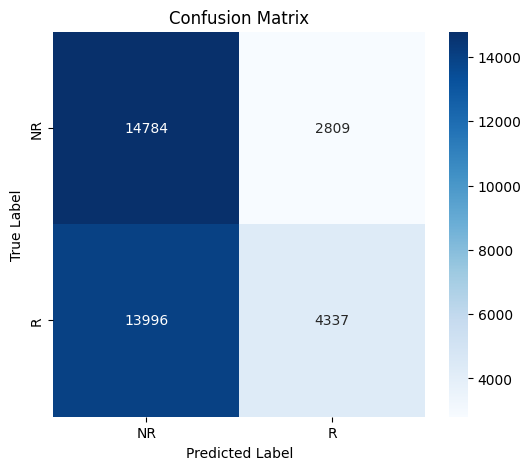

<ipython-input-6-93953ad6c106>:64: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(x=label_encoder.classes_, y=class_accuracy, palette="Blues")


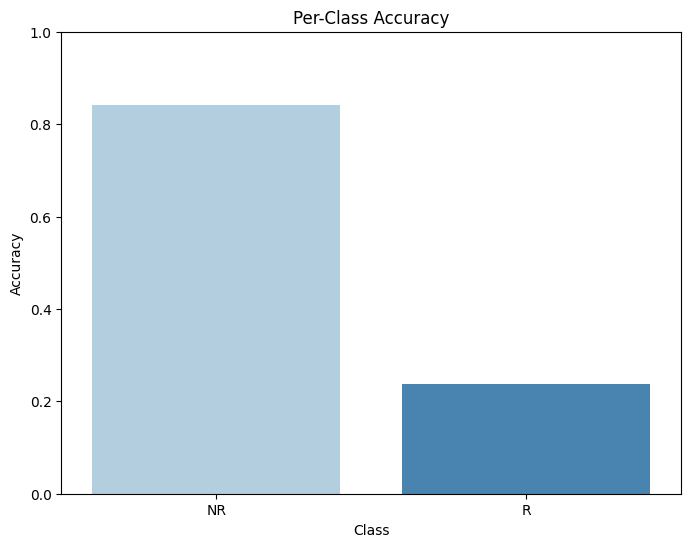

In [ ]:
import torch
from sklearn.model_selection import GroupShuffleSplit
import numpy as np
from sklearn.svm import SVC
from sklearn.metrics import accuracy_score, classification_report, confusion_matrix
from sklearn.preprocessing import LabelEncoder
import matplotlib.pyplot as plt
import seaborn as sns

# Use the subset of data
adata_sub = adata_Baseline

# Extract features (gene expression matrix) and labels (response)
X = adata_sub.X  # Cell features (gene expression matrix)
y = adata_sub.obs['response'].astype(str)  # Convert response to string if categorical

# Convert categorical labels to numeric
label_encoder = LabelEncoder()
y = label_encoder.fit_transform(y)

# Get patient IDs (used for grouped splitting)
patient_ids = adata_sub.obs['barcode']  # Ensure this is the correct column

# Initialize GroupShuffleSplit
gss = GroupShuffleSplit(n_splits=1, test_size=0.4, random_state=42)

# Split data into train and test sets while keeping the same patient in either train or test
for train_idx, test_idx in gss.split(X, y, groups=patient_ids):
    X_train, X_test = X[train_idx], X[test_idx]
    y_train, y_test = y[train_idx], y[test_idx]

# Convert to NumPy arrays (needed for scikit-learn)
X_train = np.array(X_train)
X_test = np.array(X_test)

# Define and train SVM classifier with RBF kernel
svm_model = SVC(kernel="rbf", C=1.0, gamma="scale")  # Radial Basis Function kernel for non-linearity
svm_model.fit(X_train, y_train)

# Make predictions
y_pred = svm_model.predict(X_test)

# Print accuracy and classification report
print("Accuracy:", accuracy_score(y_test, y_pred))
print(classification_report(y_test, y_pred, target_names=label_encoder.classes_))

# Confusion matrix
conf_matrix = confusion_matrix(y_test, y_pred)

# Plot Confusion Matrix
plt.figure(figsize=(6, 5))
sns.heatmap(conf_matrix, annot=True, fmt="d", cmap="Blues",
            xticklabels=label_encoder.classes_, yticklabels=label_encoder.classes_)
plt.xlabel("Predicted Label")
plt.ylabel("True Label")
plt.title("Confusion Matrix")
plt.show()

# Per-class accuracy
class_accuracy = np.diag(conf_matrix) / conf_matrix.sum(axis=1)

# Plot per-class accuracy
plt.figure(figsize=(8, 6))
sns.barplot(x=label_encoder.classes_, y=class_accuracy, palette="Blues")
plt.ylim(0, 1)
plt.ylabel("Accuracy")
plt.xlabel("Class")
plt.title("Per-Class Accuracy")
plt.show()


**With Cross validation**

/usr/local/lib/python3.11/dist-packages/sklearn/base.py:474: FutureWarning: `BaseEstimator._validate_data` is deprecated in 1.6 and will be removed in 1.7. Use `sklearn.utils.validation.validate_data` instead. This function becomes public and is part of the scikit-learn developer API.
  # that has no feature names.
/usr/local/lib/python3.11/dist-packages/sklearn/base.py:474: FutureWarning: `BaseEstimator._validate_data` is deprecated in 1.6 and will be removed in 1.7. Use `sklearn.utils.validation.validate_data` instead. This function becomes public and is part of the scikit-learn developer API.
  # that has no feature names.


Accuracy: 0.5684
              precision    recall  f1-score   support

          NR       0.45      0.67      0.54      7704
           R       0.72      0.51      0.60     12953

    accuracy                           0.57     20657
   macro avg       0.58      0.59      0.57     20657
weighted avg       0.62      0.57      0.57     20657



/usr/local/lib/python3.11/dist-packages/sklearn/base.py:474: FutureWarning: `BaseEstimator._validate_data` is deprecated in 1.6 and will be removed in 1.7. Use `sklearn.utils.validation.validate_data` instead. This function becomes public and is part of the scikit-learn developer API.
  # that has no feature names.
/usr/local/lib/python3.11/dist-packages/sklearn/base.py:474: FutureWarning: `BaseEstimator._validate_data` is deprecated in 1.6 and will be removed in 1.7. Use `sklearn.utils.validation.validate_data` instead. This function becomes public and is part of the scikit-learn developer API.
  # that has no feature names.


Accuracy: 0.2152
              precision    recall  f1-score   support

          NR       0.19      0.83      0.31      5301
           R       0.48      0.04      0.08     19042

    accuracy                           0.22     24343
   macro avg       0.34      0.44      0.20     24343
weighted avg       0.42      0.22      0.13     24343



/usr/local/lib/python3.11/dist-packages/sklearn/base.py:474: FutureWarning: `BaseEstimator._validate_data` is deprecated in 1.6 and will be removed in 1.7. Use `sklearn.utils.validation.validate_data` instead. This function becomes public and is part of the scikit-learn developer API.
  # that has no feature names.
/usr/local/lib/python3.11/dist-packages/sklearn/base.py:474: FutureWarning: `BaseEstimator._validate_data` is deprecated in 1.6 and will be removed in 1.7. Use `sklearn.utils.validation.validate_data` instead. This function becomes public and is part of the scikit-learn developer API.
  # that has no feature names.


Accuracy: 0.5987
              precision    recall  f1-score   support

          NR       0.69      0.58      0.63     19915
           R       0.51      0.62      0.56     13871

    accuracy                           0.60     33786
   macro avg       0.60      0.60      0.60     33786
weighted avg       0.61      0.60      0.60     33786



/usr/local/lib/python3.11/dist-packages/sklearn/base.py:474: FutureWarning: `BaseEstimator._validate_data` is deprecated in 1.6 and will be removed in 1.7. Use `sklearn.utils.validation.validate_data` instead. This function becomes public and is part of the scikit-learn developer API.
  # that has no feature names.
/usr/local/lib/python3.11/dist-packages/sklearn/base.py:474: FutureWarning: `BaseEstimator._validate_data` is deprecated in 1.6 and will be removed in 1.7. Use `sklearn.utils.validation.validate_data` instead. This function becomes public and is part of the scikit-learn developer API.
  # that has no feature names.


Accuracy: 0.5398
              precision    recall  f1-score   support

          NR       0.53      0.67      0.60      9648
           R       0.55      0.40      0.47      9563

    accuracy                           0.54     19211
   macro avg       0.54      0.54      0.53     19211
weighted avg       0.54      0.54      0.53     19211



/usr/local/lib/python3.11/dist-packages/sklearn/base.py:474: FutureWarning: `BaseEstimator._validate_data` is deprecated in 1.6 and will be removed in 1.7. Use `sklearn.utils.validation.validate_data` instead. This function becomes public and is part of the scikit-learn developer API.
  # that has no feature names.
/usr/local/lib/python3.11/dist-packages/sklearn/base.py:474: FutureWarning: `BaseEstimator._validate_data` is deprecated in 1.6 and will be removed in 1.7. Use `sklearn.utils.validation.validate_data` instead. This function becomes public and is part of the scikit-learn developer API.
  # that has no feature names.


Accuracy: 0.3101
              precision    recall  f1-score   support

          NR       0.44      0.38      0.41     12892
           R       0.16      0.19      0.17      7782

    accuracy                           0.31     20674
   macro avg       0.30      0.29      0.29     20674
weighted avg       0.33      0.31      0.32     20674


Mean Accuracy across folds: 0.4464 ± 0.1542


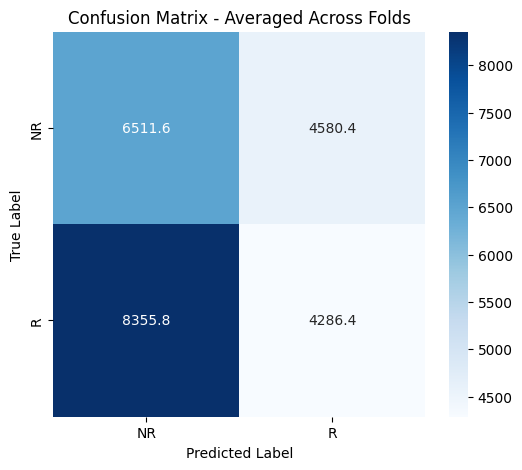

In [ ]:
from sklearn.model_selection import GroupShuffleSplit
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import accuracy_score, classification_report, confusion_matrix
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt

# Extract features (gene expression matrix) and labels (response)
X = adata_kymriah_baseline.X
y = adata_kymriah_baseline.obs['response'].astype(str)
patient_ids = adata_kymriah_baseline.obs['barcode']

# Initialize GroupShuffleSplit for Cross-Validation
gss = GroupShuffleSplit(n_splits=5, test_size=0.4, random_state=42)  # 5 folds, 60:40 split

accuracies = []
conf_matrices = []

for train_idx, test_idx in gss.split(X, y, groups=patient_ids):
    X_train, X_test = X[train_idx], X[test_idx]
    y_train, y_test = y.iloc[train_idx], y.iloc[test_idx]

    # Train Logistic Regression model
    clf = LogisticRegression(max_iter=1000, random_state=42)
    clf.fit(X_train, y_train)

    # Predict on test set
    y_pred = clf.predict(X_test)

    # Store results
    acc = accuracy_score(y_test, y_pred)
    accuracies.append(acc)
    conf_matrices.append(confusion_matrix(y_test, y_pred))

    print(f"Accuracy: {acc:.4f}")
    print(classification_report(y_test, y_pred))

# **Final Average Accuracy**
print(f"\nMean Accuracy across folds: {np.mean(accuracies):.4f} ± {np.std(accuracies):.4f}")

# **Aggregate Confusion Matrices**
final_conf_matrix = np.mean(conf_matrices, axis=0)

# **Plot Final Confusion Matrix**
plt.figure(figsize=(6, 5))
sns.heatmap(final_conf_matrix, annot=True, fmt=".1f", cmap="Blues",
            xticklabels=np.unique(y), yticklabels=np.unique(y))
plt.xlabel("Predicted Label")
plt.ylabel("True Label")
plt.title("Confusion Matrix - Averaged Across Folds")
plt.show()


**Radom split - shuffling data among all patient cells**

In [ ]:
from sklearn.model_selection import GroupShuffleSplit
import numpy as np
from sklearn.model_selection import train_test_split

# Extract features (gene expression matrix) and labels (response)
X = adata_kymriah_Infusion.X  # Cell features (gene expression matrix)
y = adata_kymriah_Infusion.obs['response'].astype(str)  # Convert response to string if categorical

# Get the patient ID from the `obs` (assuming patient info is in the 'patient' column)
patient_ids = adata_kymriah_Infusion.obs['barcode']  # Replace with the actual column name if different

# Initialize GroupShuffleSplit
gss = GroupShuffleSplit(n_splits=5, test_size=0.4, random_state=42)

# Remove the patient grouping constraint

X_train, X_test, y_train, y_test = train_test_split(
    X, y, test_size=0.4, random_state=42, shuffle=True
)

# Now you have X_train, X_test, y_train, y_test, with patients split correctly
# Initialize and train a Random Forest model
clf = LogisticRegression(max_iter=1000, random_state=42)

# clf = RandomForestClassifier(n_estimators=100, random_state=42)
clf.fit(X_train, y_train)

# Predict on test set
y_pred = clf.predict(X_test)

# Print accuracy and classification report
print("Accuracy:", accuracy_score(y_test, y_pred))
print(classification_report(y_test, y_pred))



/usr/local/lib/python3.11/dist-packages/sklearn/base.py:474: FutureWarning: `BaseEstimator._validate_data` is deprecated in 1.6 and will be removed in 1.7. Use `sklearn.utils.validation.validate_data` instead. This function becomes public and is part of the scikit-learn developer API.
  # that has no feature names.
/usr/local/lib/python3.11/dist-packages/sklearn/base.py:474: FutureWarning: `BaseEstimator._validate_data` is deprecated in 1.6 and will be removed in 1.7. Use `sklearn.utils.validation.validate_data` instead. This function becomes public and is part of the scikit-learn developer API.
  # that has no feature names.


Accuracy: 0.9016821602478973
              precision    recall  f1-score   support

          NR       0.90      0.91      0.91     11866
           R       0.90      0.89      0.90     10724

    accuracy                           0.90     22590
   macro avg       0.90      0.90      0.90     22590
weighted avg       0.90      0.90      0.90     22590



In [ ]:
from sklearn.model_selection import KFold
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import accuracy_score, classification_report
import numpy as np
from sklearn.model_selection import train_test_split

# Extract features (gene expression matrix) and labels (response)
X = adata_kymriah_Infusion.X  # Cell features (gene expression matrix)
y = adata_kymriah_Infusion.obs['response'].astype(str)  # Convert response to string if categorical

# Initialize KFold for cross-validation
kf = KFold(n_splits=5, shuffle=True, random_state=42)  # 5 splits with shuffling

# Initialize Logistic Regression model
clf = LogisticRegression(max_iter=1000, random_state=42)

# Perform cross-validation with a 60:40 split
for train_idx, test_idx in kf.split(X, y):  # No patient grouping constraint
    # Get the data for the current fold
    X_fold, y_fold = X[train_idx], y.iloc[train_idx]

    # Split each fold into 60:40 for training and testing
    X_train, X_test, y_train, y_test = train_test_split(
        X_fold, y_fold, test_size=0.4, random_state=42, shuffle=True
    )

    # Train the model
    clf.fit(X_train, y_train)

    # Predict on the test set
    y_pred = clf.predict(X_test)

    # Print accuracy and classification report for each split
    print("Accuracy:", accuracy_score(y_test, y_pred))
    print(classification_report(y_test, y_pred))


/usr/local/lib/python3.11/dist-packages/sklearn/base.py:474: FutureWarning: `BaseEstimator._validate_data` is deprecated in 1.6 and will be removed in 1.7. Use `sklearn.utils.validation.validate_data` instead. This function becomes public and is part of the scikit-learn developer API.
  # that has no feature names.
/usr/local/lib/python3.11/dist-packages/sklearn/base.py:474: FutureWarning: `BaseEstimator._validate_data` is deprecated in 1.6 and will be removed in 1.7. Use `sklearn.utils.validation.validate_data` instead. This function becomes public and is part of the scikit-learn developer API.
  # that has no feature names.


Accuracy: 0.9026671093404162
              precision    recall  f1-score   support

          NR       0.91      0.91      0.91      9480
           R       0.90      0.90      0.90      8592

    accuracy                           0.90     18072
   macro avg       0.90      0.90      0.90     18072
weighted avg       0.90      0.90      0.90     18072



/usr/local/lib/python3.11/dist-packages/sklearn/base.py:474: FutureWarning: `BaseEstimator._validate_data` is deprecated in 1.6 and will be removed in 1.7. Use `sklearn.utils.validation.validate_data` instead. This function becomes public and is part of the scikit-learn developer API.
  # that has no feature names.
/usr/local/lib/python3.11/dist-packages/sklearn/base.py:474: FutureWarning: `BaseEstimator._validate_data` is deprecated in 1.6 and will be removed in 1.7. Use `sklearn.utils.validation.validate_data` instead. This function becomes public and is part of the scikit-learn developer API.
  # that has no feature names.


Accuracy: 0.9059318282425852
              precision    recall  f1-score   support

          NR       0.91      0.91      0.91      9485
           R       0.90      0.90      0.90      8587

    accuracy                           0.91     18072
   macro avg       0.91      0.91      0.91     18072
weighted avg       0.91      0.91      0.91     18072



/usr/local/lib/python3.11/dist-packages/sklearn/base.py:474: FutureWarning: `BaseEstimator._validate_data` is deprecated in 1.6 and will be removed in 1.7. Use `sklearn.utils.validation.validate_data` instead. This function becomes public and is part of the scikit-learn developer API.
  # that has no feature names.
/usr/local/lib/python3.11/dist-packages/sklearn/base.py:474: FutureWarning: `BaseEstimator._validate_data` is deprecated in 1.6 and will be removed in 1.7. Use `sklearn.utils.validation.validate_data` instead. This function becomes public and is part of the scikit-learn developer API.
  # that has no feature names.


Accuracy: 0.9053231518370961
              precision    recall  f1-score   support

          NR       0.91      0.91      0.91      9452
           R       0.90      0.90      0.90      8620

    accuracy                           0.91     18072
   macro avg       0.91      0.91      0.91     18072
weighted avg       0.91      0.91      0.91     18072



/usr/local/lib/python3.11/dist-packages/sklearn/base.py:474: FutureWarning: `BaseEstimator._validate_data` is deprecated in 1.6 and will be removed in 1.7. Use `sklearn.utils.validation.validate_data` instead. This function becomes public and is part of the scikit-learn developer API.
  # that has no feature names.
/usr/local/lib/python3.11/dist-packages/sklearn/base.py:474: FutureWarning: `BaseEstimator._validate_data` is deprecated in 1.6 and will be removed in 1.7. Use `sklearn.utils.validation.validate_data` instead. This function becomes public and is part of the scikit-learn developer API.
  # that has no feature names.


Accuracy: 0.9080898627711377
              precision    recall  f1-score   support

          NR       0.91      0.91      0.91      9508
           R       0.90      0.90      0.90      8564

    accuracy                           0.91     18072
   macro avg       0.91      0.91      0.91     18072
weighted avg       0.91      0.91      0.91     18072



/usr/local/lib/python3.11/dist-packages/sklearn/base.py:474: FutureWarning: `BaseEstimator._validate_data` is deprecated in 1.6 and will be removed in 1.7. Use `sklearn.utils.validation.validate_data` instead. This function becomes public and is part of the scikit-learn developer API.
  # that has no feature names.
/usr/local/lib/python3.11/dist-packages/sklearn/base.py:474: FutureWarning: `BaseEstimator._validate_data` is deprecated in 1.6 and will be removed in 1.7. Use `sklearn.utils.validation.validate_data` instead. This function becomes public and is part of the scikit-learn developer API.
  # that has no feature names.


Accuracy: 0.9077578574590527
              precision    recall  f1-score   support

          NR       0.91      0.91      0.91      9516
           R       0.90      0.90      0.90      8556

    accuracy                           0.91     18072
   macro avg       0.91      0.91      0.91     18072
weighted avg       0.91      0.91      0.91     18072



In [ ]:


# Extract features (gene expression matrix) and labels (response)
X = adata_kymriah_baseline.X  # Gene expression matrix
y = adata_kymriah_baseline.obs['response'].astype(str)  # Convert response to string

# Get patient IDs (grouping variable for splitting)
patient_ids = adata_kymriah_baseline.obs['barcode']  # Ensure this column represents patient identity

# Initialize GroupShuffleSplit (ensures whole patients are in train OR test)
gss = GroupShuffleSplit(n_splits=1, test_size=0.4, random_state=42)

# Split while keeping all cells from a patient in the same set
for train_idx, test_idx in gss.split(X, y, groups=patient_ids):
    X_train, X_test = X[train_idx], X[test_idx]
    y_train, y_test = y.iloc[train_idx], y.iloc[test_idx]
    test_patients = patient_ids.iloc[test_idx]  # Get corresponding test set patients

# Train Logistic Regression model
clf = LogisticRegression(max_iter=100, random_state=42)
# clf = RandomForestClassifier(n_estimators=100, random_state=42)
# **MLP Classifier**
# clf = MLPClassifier(hidden_layer_sizes=(128, 64), activation='relu', solver='adam',
#                     max_iter=500, random_state=42)
clf.fit(X_train, y_train)

# Predict on test set (cell-level predictions)
y_pred = clf.predict(X_test)

# Store predictions in a DataFrame
test_df = pd.DataFrame({
    'barcode': test_patients.values,  # Match patient IDs
    'true_label': y_test.values,
    'pred_label': y_pred
})

# **Aggregate predictions per patient using majority vote**
# channel_predictions = test_df.groupby('barcode').agg(lambda x: y_pred.value_counts().idxmax())
# Ensure we only compute majority voting for patients that actually have predictions
def majority_vote(series):
    if series.empty:
        return np.nan  # Handle empty sequences gracefully
    # Count occurrences of each label
    return series.value_counts().idxmax()

# Perform majority vote per patient (ignore empty patients)
channel_predictions = test_df.groupby('barcode').agg(majority_vote).dropna()

# Extract final labels per patient
y_true_channel = channel_predictions['true_label']
y_pred_channel = channel_predictions['pred_label']

# Compute accuracy at patient level
print("Patient-level Accuracy:", accuracy_score(y_true_channel, y_pred_channel))

# Compute classification report at patient level
print(classification_report(y_true_channel, y_pred_channel))


# **Confusion Matrix at Patient Level**
conf_matrix = confusion_matrix(y_true_channel, y_pred_channel)
plt.figure(figsize=(6, 5))
sns.heatmap(conf_matrix, annot=True, fmt='d', cmap='Blues',
            xticklabels=np.unique(y_true_channel),
            yticklabels=np.unique(y_pred_channel))
plt.xlabel("Predicted Label")
plt.ylabel("True Label")
plt.title("Confusion Matrix - Patient-Level Predictions")
plt.show()


/usr/local/lib/python3.11/dist-packages/sklearn/base.py:474: FutureWarning: `BaseEstimator._validate_data` is deprecated in 1.6 and will be removed in 1.7. Use `sklearn.utils.validation.validate_data` instead. This function becomes public and is part of the scikit-learn developer API.
  # that has no feature names.
/usr/local/lib/python3.11/dist-packages/sklearn/base.py:474: FutureWarning: `BaseEstimator._validate_data` is deprecated in 1.6 and will be removed in 1.7. Use `sklearn.utils.validation.validate_data` instead. This function becomes public and is part of the scikit-learn developer API.
  # that has no feature names.


Patient-level Accuracy: 0.5
              precision    recall  f1-score   support

          NR       0.50      0.67      0.57         3
           R       0.50      0.33      0.40         3

    accuracy                           0.50         6
   macro avg       0.50      0.50      0.49         6
weighted avg       0.50      0.50      0.49         6



<ipython-input-14-405ab7c73a39>:45: FutureWarning: The default of observed=False is deprecated and will be changed to True in a future version of pandas. Pass observed=False to retain current behavior or observed=True to adopt the future default and silence this warning.
  channel_predictions = test_df.groupby('barcode').agg(majority_vote).dropna()


# **MLP**

Using device: cuda
Epoch [2/150], Loss: 0.6681
Epoch [4/150], Loss: 0.5994
Epoch [6/150], Loss: 0.5415
Epoch [8/150], Loss: 0.5024
Epoch [10/150], Loss: 0.4549
Epoch [12/150], Loss: 0.4075
Epoch [14/150], Loss: 0.3602
Epoch [16/150], Loss: 0.3288
Epoch [18/150], Loss: 0.3051
Epoch [20/150], Loss: 0.2820
Epoch [22/150], Loss: 0.2561
Epoch [24/150], Loss: 0.2377
Epoch [26/150], Loss: 0.2230
Epoch [28/150], Loss: 0.2073
Epoch [30/150], Loss: 0.1946
Epoch [32/150], Loss: 0.1831
Epoch [34/150], Loss: 0.1714
Epoch [36/150], Loss: 0.1604
Epoch [38/150], Loss: 0.1503
Epoch [40/150], Loss: 0.1405
Epoch [42/150], Loss: 0.1311
Epoch [44/150], Loss: 0.1226
Epoch [46/150], Loss: 0.1144
Epoch [48/150], Loss: 0.1064
Epoch [50/150], Loss: 0.0990
Epoch [52/150], Loss: 0.0920
Epoch [54/150], Loss: 0.0853
Epoch [56/150], Loss: 0.0790
Epoch [58/150], Loss: 0.0730
Epoch [60/150], Loss: 0.0674
Epoch [62/150], Loss: 0.0622
Epoch [64/150], Loss: 0.0572
Epoch [66/150], Loss: 0.0527
Epoch [68/150], Loss: 0.0485

<ipython-input-95-21caea4f9458>:93: FutureWarning: The default of observed=False is deprecated and will be changed to True in a future version of pandas. Pass observed=False to retain current behavior or observed=True to adopt the future default and silence this warning.
  channel_predictions = test_df.groupby('barcode').agg({'pred_label': majority_vote, 'true_label': 'first'}).dropna()


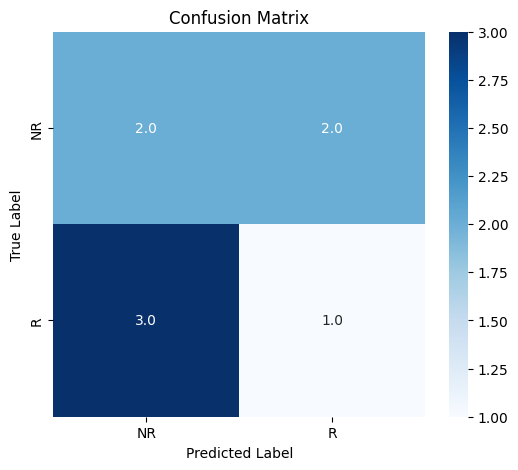

<ipython-input-95-21caea4f9458>:115: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(x=label_encoder.classes_, y=class_accuracy, palette="Blues")


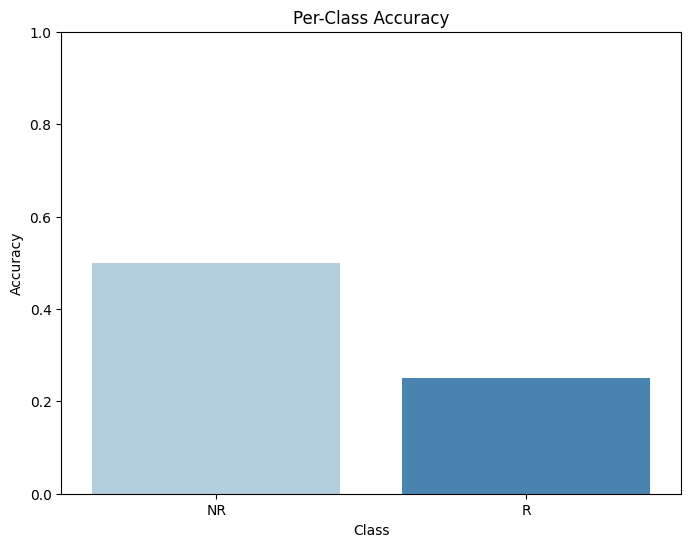

In [ ]:
import torch
import torch.nn as nn
import torch.optim as optim
from sklearn.model_selection import GroupShuffleSplit
import numpy as np
import pandas as pd
from sklearn.metrics import accuracy_score, classification_report, confusion_matrix
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.preprocessing import LabelEncoder


adata_sub= adata_Baseline


# Check if GPU is available
device = torch.device("cuda" if torch.cuda.is_available() else "cpu")
print(f"Using device: {device}")

# Extract features (gene expression matrix) and labels (response)
X = adata_sub.X
y = adata_sub.obs['response'].astype(str)

# Encode labels
label_encoder = LabelEncoder()
y = label_encoder.fit_transform(y)

# Get patient IDs
patient_ids = adata_sub.obs['barcode']

# Split data
gss = GroupShuffleSplit(n_splits=1, test_size=0.4, random_state=42)
for train_idx, test_idx in gss.split(X, y, groups=patient_ids):
    X_train, X_test = X[train_idx], X[test_idx]
    y_train, y_test = y[train_idx], y[test_idx]

# Convert to PyTorch tensors
X_train_tensor = torch.tensor(X_train, dtype=torch.float32).to(device)
X_test_tensor = torch.tensor(X_test, dtype=torch.float32).to(device)
y_train_tensor = torch.tensor(y_train, dtype=torch.long).to(device)
y_test_tensor = torch.tensor(y_test, dtype=torch.long).to(device)

# Define MLP Model
class MLP(nn.Module):
    def __init__(self, input_dim):
        super(MLP, self).__init__()
        self.fc1 = nn.Linear(input_dim, 32) # 128- 64
        self.relu = nn.ReLU()
        self.fc2 = nn.Linear(32, 4)
        self.relu = nn.ReLU()

        self.fc3 = nn.Linear(4, 2)  # 2 classes

    def forward(self, x):
        x = self.relu(self.fc1(x))
        x = self.relu(self.fc2(x))
        x = self.fc3(x)
        return x

# Initialize model
model = MLP(X_train_tensor.shape[1]).to(device)
criterion = nn.CrossEntropyLoss()
optimizer = optim.Adam(model.parameters(), lr=0.001)

# Training loop
num_epochs = 150 #10
for epoch in range(num_epochs):
    model.train()
    optimizer.zero_grad()
    outputs = model(X_train_tensor)
    loss = criterion(outputs, y_train_tensor)
    loss.backward()
    optimizer.step()

    if (epoch + 1) % 2 == 0:
        print(f"Epoch [{epoch+1}/{num_epochs}], Loss: {loss.item():.4f}")

# Evaluate model
model.eval()
with torch.no_grad():
    outputs = model(X_test_tensor)
    _, predicted = torch.max(outputs, 1)

y_pred = predicted.cpu().numpy()
y_true = y_test_tensor.cpu().numpy()

# Majority vote per patient
test_df = pd.DataFrame({'barcode': patient_ids.iloc[test_idx].values, 'true_label': y_true, 'pred_label': y_pred})

def majority_vote(series):
    return series.value_counts().idxmax() if not series.empty else np.nan

channel_predictions = test_df.groupby('barcode').agg({'pred_label': majority_vote, 'true_label': 'first'}).dropna()

y_true_channel = channel_predictions['true_label']
y_pred_channel = channel_predictions['pred_label']

# Accuracy & confusion matrix
print("Patient-level Accuracy:", accuracy_score(y_true_channel, y_pred_channel))
print("Patient-level Classification Report:")
print(classification_report(y_true_channel, y_pred_channel, target_names=label_encoder.classes_))

conf_matrix = confusion_matrix(y_true_channel, y_pred_channel)
plt.figure(figsize=(6, 5))
sns.heatmap(conf_matrix, annot=True, fmt=".1f", cmap="Blues", xticklabels=label_encoder.classes_, yticklabels=label_encoder.classes_)
plt.xlabel("Predicted Label")
plt.ylabel("True Label")
plt.title("Confusion Matrix")
plt.show()
# Per-class accuracy: Correct predictions / Total actual instances
class_accuracy = np.diag(conf_matrix) / conf_matrix.sum(axis=1)

# Plot per-class accuracy
plt.figure(figsize=(8, 6))
sns.barplot(x=label_encoder.classes_, y=class_accuracy, palette="Blues")
plt.ylim(0, 1)  # Accuracy is between 0 and 1
plt.ylabel("Accuracy")
plt.xlabel("Class")
plt.title("Per-Class Accuracy")
plt.show()



**ScVI as embedder**

In [ ]:

# !pip install scvi-tools
import scvi
import scipy
# Prepare data
adata_sub= adata_Baseline.to_memory()

# adata_kymriah_Infusion = adata_kymriah_Infusion.to_memory()
print("NaNs in X:", np.isnan(adata_sub.X).sum())
if isinstance(adata_sub.X, scipy.sparse.spmatrix):
    nan_count = np.isnan(adata_sub.X.toarray()).sum()  # Convert sparse to dense before checking
else:
    nan_count = np.isnan(adata_sub.X).sum()

print(f"Number of NaNs in X: {nan_count}")

if isinstance(adata_sub.X, scipy.sparse.spmatrix):
    adata_sub.X = scipy.sparse.csr_matrix(np.nan_to_num(adata_sub.X.toarray()))
else:
    adata_sub.X = np.nan_to_num(adata_sub.X)

if isinstance(adata_sub.X, scipy.sparse.spmatrix):
    adata_sub.X = adata_Yescarta_Baseline.X.toarray()


# # adata_kymriah_Infusion.layers["counts"] = adata_kymriah_Infusion.X.copy()
# adata_kymriah_Infusion.layers["counts"] = adata_kymriah_Infusion.raw.X.copy()


# print("Min value in counts:", np.min(adata_kymriah_Infusion.layers["counts"]))
# print("Are all counts integers?", np.all(adata_kymriah_Infusion.layers["counts"] == adata_kymriah_Infusion.layers["counts"].astype(int)))





# scvi.model.SCVI.setup_anndata(adata_kymriah_Infusion, layer="counts")
# model = scvi.model.SCVI(adata_kymriah_Infusion)
# model.train(max_epochs=200, plan_kwargs={"lr": 1e-3})


# # Get latent representations
# adata_kymriah_Infusion.obsm["X_scVI"] = model.get_latent_representation()


NaNs in X: 0
Number of NaNs in X: 0


In [ ]:
print("Does raw exist?", adata_sub.raw is not None)
print("Shape of adata.raw.X:", adata_sub.raw.X.shape)
print("Shape of adata.X:", adata_sub.X.shape)
import numpy as np

# # Ensure raw data is in dense format
# if hasattr(adata_kymriah_Infusion.raw.X, "toarray"):
#     raw_counts = adata_kymriah_Infusion.raw.X.toarray()
# else:
#     raw_counts = adata_kymriah_Infusion.raw.X

# # Subset raw counts to only keep genes that exist in adata_kymriah_Infusion.X
#

# Convert raw.X to dense format if needed
if hasattr(adata_sub.raw.X, "toarray"):
    raw_counts = adata_sub.raw.X.toarray()
else:
    raw_counts = adata_sub.raw.X

# Ensure var_names are aligned
common_genes = adata_sub.var_names.intersection(adata_sub.raw.var_names)

# Subset raw counts to match current genes
adata_sub.layers["counts"] = raw_counts[:, adata_sub.raw.var_names.get_indexer(common_genes)]

print("New counts shape:", adata_sub.layers["counts"].shape)


Does raw exist? True
Shape of adata.raw.X: (36077, 36983)
Shape of adata.X: (36077, 5072)
New counts shape: (36077, 5072)


In [ ]:
adata_sub.layers["counts"] = np.expm1(adata_sub.layers["counts"])
adata_sub.layers["counts"] = np.round(adata_sub.layers["counts"]).astype(int)

print("Min value in counts:", np.min(adata_sub.layers["counts"]))
print("Are all counts integers?", np.all(adata_sub.layers["counts"] == adata_sub.layers["counts"].astype(int)))



Min value in counts: 0
Are all counts integers? True


In [ ]:
scvi.model.SCVI.setup_anndata(adata_sub, layer="counts")
ScVI_model = scvi.model.SCVI(adata_sub)
ScVI_model.train(max_epochs=20, plan_kwargs={"lr": 1e-3})

INFO: GPU available: True (cuda), used: True
INFO:lightning.pytorch.utilities.rank_zero:GPU available: True (cuda), used: True
INFO: TPU available: False, using: 0 TPU cores
INFO:lightning.pytorch.utilities.rank_zero:TPU available: False, using: 0 TPU cores
INFO: HPU available: False, using: 0 HPUs
INFO:lightning.pytorch.utilities.rank_zero:HPU available: False, using: 0 HPUs
INFO: LOCAL_RANK: 0 - CUDA_VISIBLE_DEVICES: [0]
INFO:lightning.pytorch.accelerators.cuda:LOCAL_RANK: 0 - CUDA_VISIBLE_DEVICES: [0]
/usr/local/lib/python3.11/dist-packages/lightning/pytorch/trainer/connectors/data_connector.py:425: The 'train_dataloader' does not have many workers which may be a bottleneck. Consider increasing the value of the `num_workers` argument` to `num_workers=7` in the `DataLoader` to improve performance.


Training:   0%|          | 0/20 [00:00<?, ?it/s]

INFO: `Trainer.fit` stopped: `max_epochs=20` reached.
INFO:lightning.pytorch.utilities.rank_zero:`Trainer.fit` stopped: `max_epochs=20` reached.


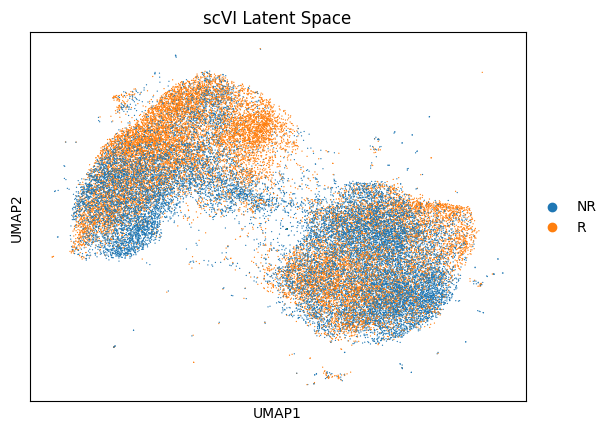

In [ ]:
import scanpy as sc
import matplotlib.pyplot as plt


# Get latent representations
adata_sub.obsm["X_scVI"] = ScVI_model.get_latent_representation()

# Compute UMAP on scVI latent space
sc.pp.neighbors(adata_sub.to_memory(), use_rep="X_scVI")
sc.tl.umap(adata_sub)

# Plot UMAP, coloring by response
sc.pl.umap(adata_sub, color="response", title="scVI Latent Space")



In [ ]:
from sklearn.preprocessing import LabelEncoder
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import accuracy_score
# Get latent representations
latent_embeddings = adata_sub.obsm["X_scVI"]# ScVI_model.get_latent_representation()

# Assuming response labels are stored in adata.obs["response"]
# Convert categorical labels to numerical (if not already done)

label_encoder = LabelEncoder()
y = label_encoder.fit_transform(adata_sub.obs["response"])  # Convert to 0/1 or numerical categories


patient_ids = adata_sub.obs['barcode'].values

# Perform the split by patient IDs (80% train, 20% test)
train_barcodes, test_barcodes = train_test_split(np.unique(patient_ids), test_size=0.4, random_state=42)

# Filter the data for train and test sets based on barcodes
train_mask = np.isin(patient_ids, train_barcodes)
test_mask = np.isin(patient_ids, test_barcodes)

# Split the embeddings and labels
X_train = latent_embeddings[train_mask]
y_train = y[train_mask]
X_test = latent_embeddings[test_mask]
y_test = y[test_mask]

# # Split into train and test sets
# X_train, X_test, y_train, y_test = train_test_split(latent_embeddings, y, test_size=0.4, random_state=42)



# Train a logistic regression model
clf = LogisticRegression(max_iter=500)
clf.fit(X_train, y_train)

# Evaluate performance
y_pred = clf.predict(X_test)
accuracy = accuracy_score(y_test, y_pred)

print(f"Test Accuracy: {accuracy:.4f}")



Test Accuracy: 0.6689


 **ScVI as embedder**

Test Accuracy: 0.6078
Cell-Level Classification Report:
              precision    recall  f1-score   support

          NR       0.62      0.66      0.64      7399
           R       0.60      0.55      0.57      6812

    accuracy                           0.61     14211
   macro avg       0.61      0.61      0.61     14211
weighted avg       0.61      0.61      0.61     14211

Patient-Level Confusion Matrix:


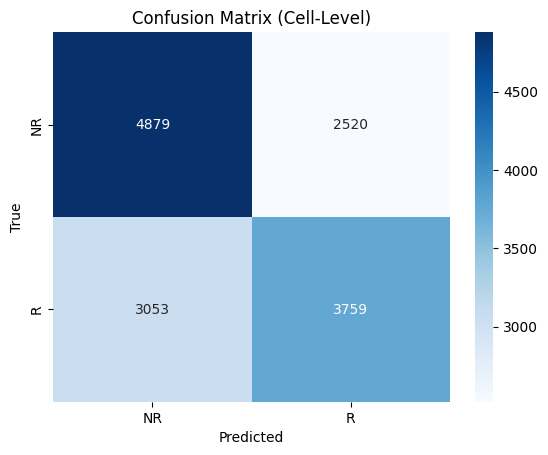

<ipython-input-102-b6060fcadefc>:62: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(x=label_encoder.classes_, y=class_accuracy, palette="Blues")


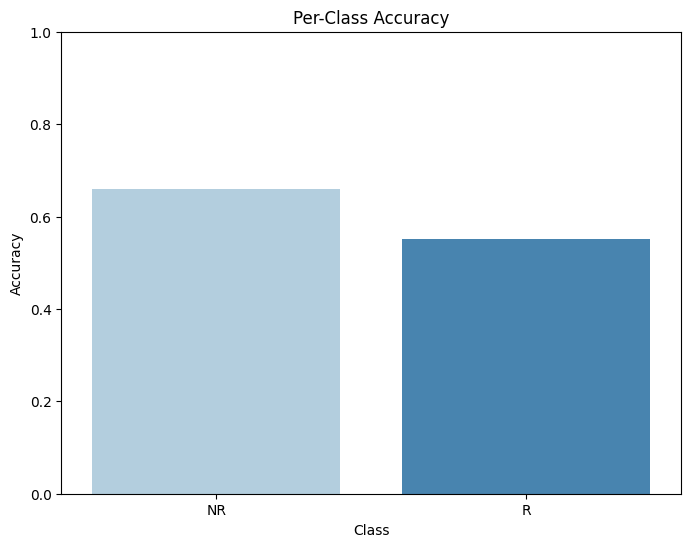

Patient-Level Test Accuracy: 0.3750
Patient-Level Classification Report:
              precision    recall  f1-score   support

          NR       0.40      0.50      0.44         4
           R       0.33      0.25      0.29         4

    accuracy                           0.38         8
   macro avg       0.37      0.38      0.37         8
weighted avg       0.37      0.38      0.37         8

Patient-Level Confusion Matrix:
[[2 2]
 [3 1]]


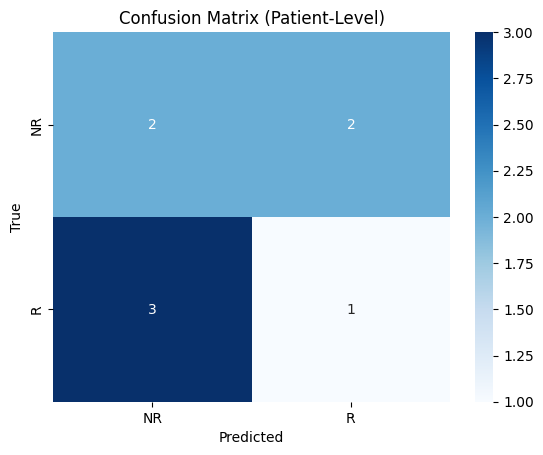

In [ ]:
import numpy as np
from sklearn.preprocessing import LabelEncoder
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import accuracy_score, classification_report, confusion_matrix
import matplotlib.pyplot as plt
import seaborn as sns

# Get latent representations (embedding vectors from a previous model)
latent_embeddings =adata_sub.obsm["X_scVI"]# model.get_latent_representation()

# Assuming response labels are stored in adata.obs["response"]
# Convert categorical labels to numerical (if not already done)
label_encoder = LabelEncoder()
y = label_encoder.fit_transform(adata_sub.obs["response"])  # Convert to 0/1 or numerical categories

patient_ids = adata_sub.obs['barcode'].values

# Perform the split by patient IDs (80% train, 20% test)
train_barcodes, test_barcodes = train_test_split(np.unique(patient_ids), test_size=0.4, random_state=42)

# Filter the data for train and test sets based on barcodes
train_mask = np.isin(patient_ids, train_barcodes)
test_mask = np.isin(patient_ids, test_barcodes)

# Split the embeddings and labels
X_train = latent_embeddings[train_mask]
y_train = y[train_mask]
X_test = latent_embeddings[test_mask]
y_test = y[test_mask]

# Train a logistic regression model
clf = LogisticRegression(max_iter=500)
clf.fit(X_train, y_train)

# Predict at the cell level
y_pred_cells = clf.predict(X_test)
accuracy = accuracy_score(y_test, y_pred_cells)

print(f"Test Accuracy: {accuracy:.4f}")


# Classification report at patient level
print("Cell-Level Classification Report:")
print(classification_report(y_test, y_pred_cells, target_names=label_encoder.classes_))

# Confusion matrix at patient level
cm_cell = confusion_matrix(y_test, y_pred_cells)
print("Patient-Level Confusion Matrix:")

# Plot confusion matrix
sns.heatmap(cm_cell, annot=True, fmt='d', cmap='Blues', xticklabels=label_encoder.classes_, yticklabels=label_encoder.classes_)
plt.xlabel('Predicted')
plt.ylabel('True')
plt.title('Confusion Matrix (Cell-Level)')
plt.show()
# Per-class accuracy: Correct predictions / Total actual instances
class_accuracy = np.diag(cm_cell) / cm_cell.sum(axis=1)

# Plot per-class accuracy
plt.figure(figsize=(8, 6))
sns.barplot(x=label_encoder.classes_, y=class_accuracy, palette="Blues")
plt.ylim(0, 1)  # Accuracy is between 0 and 1
plt.ylabel("Accuracy")
plt.xlabel("Class")
plt.title("Per-Class Accuracy")
plt.show()


# To predict at the patient level, we need to aggregate cell-level predictions by patient
# Get the patient-level prediction (taking the mode of the predicted labels for cells of each patient)
patient_predictions = []
true_patient_labels = []

for patient in np.unique(test_barcodes):
    # Get the indices for the current patient
    patient_mask = np.isin(patient_ids[test_mask], patient)

    # Aggregate cell predictions (mode or majority vote)
    patient_pred = np.argmax(np.bincount(y_pred_cells[patient_mask]))
    patient_predictions.append(patient_pred)

    # Get the true label for the patient (use the majority label across cells)
    patient_true = np.argmax(np.bincount(y_test[patient_mask]))
    true_patient_labels.append(patient_true)

# Compute accuracy and confusion matrix at the patient level
patient_accuracy = accuracy_score(true_patient_labels, patient_predictions)
print(f"Patient-Level Test Accuracy: {patient_accuracy:.4f}")

# Classification report at patient level
print("Patient-Level Classification Report:")
print(classification_report(true_patient_labels, patient_predictions, target_names=label_encoder.classes_))

# Confusion matrix at patient level
cm_patient = confusion_matrix(true_patient_labels, patient_predictions)
print("Patient-Level Confusion Matrix:")
print(cm_patient)

# Plot confusion matrix
sns.heatmap(cm_patient, annot=True, fmt='d', cmap='Blues', xticklabels=label_encoder.classes_, yticklabels=label_encoder.classes_)
plt.xlabel('Predicted')
plt.ylabel('True')
plt.title('Confusion Matrix (Patient-Level)')
plt.show()


Epoch 0, Loss: 0.6978
Epoch 50, Loss: 0.3607
Epoch 100, Loss: 0.3067
Epoch 150, Loss: 0.2931
Epoch 200, Loss: 0.2895
Epoch 250, Loss: 0.2831
Epoch 300, Loss: 0.2808
Epoch 350, Loss: 0.2781
Epoch 400, Loss: 0.2793
Epoch 450, Loss: 0.2776
Epoch 500, Loss: 0.2775
Epoch 550, Loss: 0.2752
Epoch 600, Loss: 0.2756
Epoch 650, Loss: 0.2763
Epoch 700, Loss: 0.2764
Epoch 750, Loss: 0.2756
Epoch 800, Loss: 0.2756
Epoch 850, Loss: 0.2733
Epoch 900, Loss: 0.2736
Epoch 950, Loss: 0.2762
Epoch 1000, Loss: 0.2737
Epoch 1050, Loss: 0.2742
Epoch 1100, Loss: 0.2735
Epoch 1150, Loss: 0.2727
Epoch 1200, Loss: 0.2732
Epoch 1250, Loss: 0.2737
Epoch 1300, Loss: 0.2741
Epoch 1350, Loss: 0.2732
Epoch 1400, Loss: 0.2734
Epoch 1450, Loss: 0.2720
Epoch 1500, Loss: 0.2737
Epoch 1550, Loss: 0.2707
Epoch 1600, Loss: 0.2714
Epoch 1650, Loss: 0.2727
Epoch 1700, Loss: 0.2719
Epoch 1750, Loss: 0.2749
Epoch 1800, Loss: 0.2711
Epoch 1850, Loss: 0.2749
Epoch 1900, Loss: 0.2717
Epoch 1950, Loss: 0.2725
Epoch 2000, Loss: 0.274

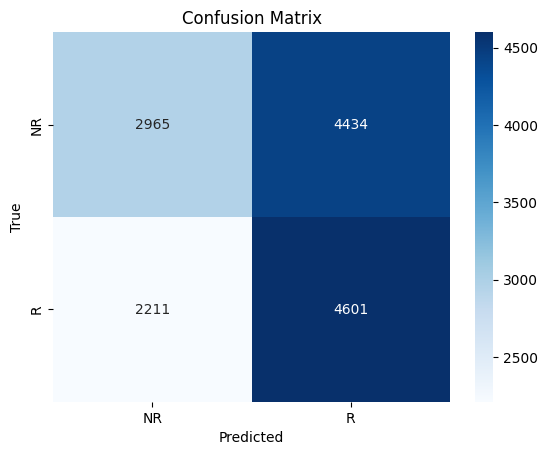

Patient-Level Test Accuracy: 0.5342
Patient-Level Classification Report:
              precision    recall  f1-score   support

          NR       0.33      0.25      0.29         4
           R       0.40      0.50      0.44         4

    accuracy                           0.38         8
   macro avg       0.37      0.38      0.37         8
weighted avg       0.37      0.38      0.37         8

Patient-Level Confusion Matrix:
[[1 3]
 [2 2]]


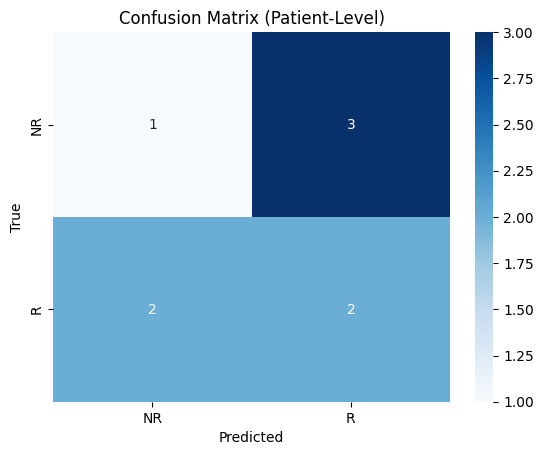

In [ ]:
import torch
import torch.nn as nn
import torch.optim as optim


# Convert data to PyTorch tensors
X_train_torch = torch.tensor(X_train, dtype=torch.float32)
y_train_torch = torch.tensor(y_train, dtype=torch.long)
X_test_torch = torch.tensor(X_test, dtype=torch.float32)
y_test_torch = torch.tensor(y_test, dtype=torch.long)

# Define the MLP classifier
class ResponsePredictor(nn.Module):
    def __init__(self, input_dim,dropout_rate=0.05):
        super().__init__()
        # self.fc = nn.Sequential(
        #     nn.Linear(input_dim, 32),
        #     nn.ReLU(),
        #     # nn.Linear(516, 32),
        #     # nn.ReLU(),
        #     nn.Linear(32, 2)  # Assuming binary classification (responder/non-responder)
        # )
        self.fc = nn.Sequential(
            nn.Linear(input_dim, 32),  # Increase size of first hidden layer
            nn.ReLU(),
            nn.Dropout(dropout_rate),  # Dropout layer
            nn.Linear(32, 8),
            nn.ReLU(),
            nn.Dropout(dropout_rate),  # Dropout layer
            nn.Linear(8, 2)  # Output layer (binary classification)
        )

    def forward(self, x):
        return self.fc(x)

# Initialize model
model_pred = ResponsePredictor(input_dim=latent_embeddings.shape[1])
criterion = nn.CrossEntropyLoss()
# optimizer = optim.Adam(model_pred.parameters(), lr=0.01)
optimizer = optim.Adam(model_pred.parameters(), lr=0.01, weight_decay=1e-3)  # L2 regularization (weight_decay)


# Train the model
epochs = 5000 #1500
for epoch in range(epochs):
    optimizer.zero_grad()
    outputs = model_pred(X_train_torch)
    loss = criterion(outputs, y_train_torch)
    loss.backward()
    optimizer.step()

    if epoch % 50 == 0:
        print(f"Epoch {epoch}, Loss: {loss.item():.4f}")

# Evaluate the model
with torch.no_grad():
    y_pred_torch = model_pred(X_test_torch).argmax(dim=1)
    acc = (y_pred_torch == y_test_torch).float().mean().item()
    print(f"Neural Network Test Accuracy: {acc:.4f}")
# After making predictions (as shown in the earlier code)
y_pred_torch = model_pred(X_test_torch).argmax(dim=1)

# Print classification report
print("Classification Report:")
print(classification_report(y_test_torch.cpu().numpy(), y_pred_torch.cpu().numpy()))

# Confusion matrix
cm = confusion_matrix(y_test_torch.cpu().numpy(), y_pred_torch.cpu().numpy())
print("Confusion Matrix:")
print(cm)

# Plot confusion matrix
sns.heatmap(cm, annot=True, fmt='d', cmap='Blues', xticklabels=label_encoder.classes_, yticklabels=label_encoder.classes_)
plt.xlabel('Predicted')
plt.ylabel('True')
plt.title('Confusion Matrix')
plt.show()


# Aggregate predictions at the patient level
patient_predictions = []
true_patient_labels = []
test_patient_ids = adata_sub.obs['barcode'].values[test_mask]  # Assuming test_mask from before

for patient in np.unique(test_patient_ids):
    # Get the indices for the current patient
    patient_mask = np.isin(test_patient_ids, patient)

    # Aggregate cell predictions (mode or majority vote)
    patient_pred = np.argmax(np.bincount(y_pred_torch[patient_mask].numpy()))
    patient_predictions.append(patient_pred)

    # Get the true label for the patient (use the majority label across cells)
    patient_true = np.argmax(np.bincount(y_test_torch[patient_mask].numpy()))
    true_patient_labels.append(patient_true)

# Compute patient-level accuracy and confusion matrix
# patient_accuracy = (np.array(patient_predictions) == np.array(true_patient_labels)).mean()
patient_accuracy =accuracy_score(true_patient_labels, patient_predictions)
print(f"Patient-Level Test Accuracy: {acc:.4f}")
# Classification report at patient level
print("Patient-Level Classification Report:")
print(classification_report(true_patient_labels, patient_predictions,target_names=label_encoder.classes_))

# Confusion matrix at patient level
cm_patient = confusion_matrix(true_patient_labels, patient_predictions)
print("Patient-Level Confusion Matrix:")
print(cm_patient)

# Plot confusion matrix at patient level
sns.heatmap(cm_patient, annot=True, fmt='d', cmap='Blues', xticklabels=label_encoder.classes_, yticklabels=label_encoder.classes_)
plt.xlabel('Predicted')
plt.ylabel('True')
plt.title('Confusion Matrix (Patient-Level)')
plt.show()


IndexError: boolean index did not match indexed array along axis 0; size of axis is 20657 but size of corresponding boolean axis is 56475

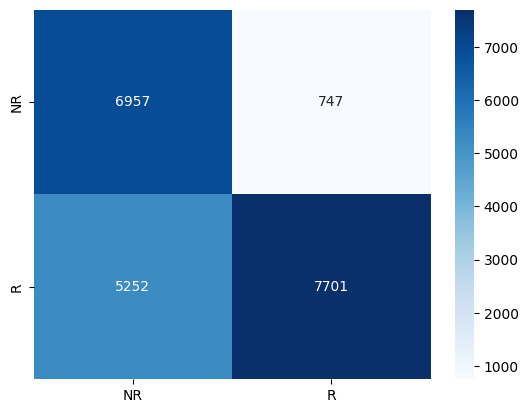

In [ ]:
sns.heatmap(cm, annot=True, fmt='d', cmap='Blues', xticklabels=label_encoder.classes_, yticklabels=label_encoder.classes_)

# Now, to calculate patient-level metrics:
# Assuming `patient_ids` is a list of patient IDs corresponding to each cell in X_train and X_test
# Here, we assume that `X_train_patient_ids` and `X_test_patient_ids` are lists/arrays of patient IDs
# that correspond to each row (cell) in the X_train and X_test datasets, respectively.
# For simplicity, I will assume that `patient_ids_train` and `patient_ids_test` are provided/available
patient_ids_test= train_mask
patient_ids_test= test_mask
# For patient-level results, aggregate cell-wise predictions per patient
def aggregate_predictions_at_patient_level(cell_predictions, patient_ids):
    # Aggregating by majority voting (mode)
    patient_predictions = []
    for patient_id in np.unique(patient_ids):
        patient_mask = patient_ids == patient_id
        patient_cell_preds = np.array(cell_predictions)[patient_mask]
        most_common_pred = np.bincount(patient_cell_preds).argmax()  # Majority vote
        patient_predictions.append(most_common_pred)
    return patient_predictions

# # Aggregate the predictions for training and testing datasets
# patient_predictions_train = aggregate_predictions_at_patient_level(y_pred_torch.numpy(), patient_ids_train)
# patient_labels_train = np.unique(patient_ids_train)  # Assuming patient-level ground truth is available

patient_predictions_test = aggregate_predictions_at_patient_level(y_pred_torch.numpy(), patient_ids_test)
patient_labels_test = np.unique(patient_ids_test)  # Assuming patient-level ground truth is available

# # Print classification report and confusion matrix for patient-level
# print("Patient-Level Classification Report (Train):")
# print(classification_report(patient_labels_train, patient_predictions_train))

# # Confusion matrix at the patient level (Train)
# cm_train = confusion_matrix(patient_labels_train, patient_predictions_train)
# print("Confusion Matrix (Train):")
# print(cm_train)

# Print classification report and confusion matrix for patient-level (Test)
print("Patient-Level Classification Report (Test):")
print(classification_report(patient_labels_test, patient_predictions_test))

# Confusion matrix at the patient level (Test)
cm_test = confusion_matrix(patient_labels_test, patient_predictions_test)
print("Confusion Matrix (Test):")
print(cm_test)

# Plot confusion matrix for testing
sns.heatmap(cm_test, annot=True, fmt='d', cmap='Blues', xticklabels=np.unique(patient_labels_test), yticklabels=np.unique(patient_labels_test))
plt.xlabel('Predicted')
plt.ylabel('True')
plt.title('Confusion Matrix (Test)')
plt.show()


In [ ]:
# Step 2: Recreate the filtered expression data
scaled_expression_data = pd.DataFrame(adata_kymriah_baseline.X, columns=adata_kymriah_baseline.var_names, index=adata_kymriah_baseline.obs.index)

# Step 3: Group by response and calculate the mean expression
scaled_mean_expression_per_response = scaled_expression_data.groupby(adata.obs["response"]).mean()

# Step 4: Plot the heatmap
plt.figure(figsize=(12, 10))
sns.heatmap(scaled_mean_expression_per_response, cmap="coolwarm", annot=False, cbar_kws={'label': 'Z-score Normalized Expression'})
plt.title("Scaled Gene Expression Patterns per Response Category")
plt.xlabel("Genes")
plt.ylabel("Response Categories")
plt.show()


In [ ]:
# # Adding cross validation to the pytorch code
# import torch
# from sklearn.model_selection import GroupKFold
# import numpy as np
# from sklearn.metrics import accuracy_score, classification_report, confusion_matrix
# from sklearn.preprocessing import LabelEncoder
# import matplotlib.pyplot as plt
# import seaborn as sns

# # Check if GPU is available with PyTorch
# gpu_available = torch.cuda.is_available()

# # Extract features (gene expression matrix) and labels (response)
# X = adata_kymriah_Infusion.X  # Cell features (gene expression matrix)
# y = adata_kymriah_Infusion.obs['response'].astype(str)  # Convert response to string if categorical

# # Convert categorical labels to numeric using LabelEncoder
# label_encoder = LabelEncoder()
# y = label_encoder.fit_transform(y)  # Convert to numeric labels

# # Get the patient ID from the `obs` (assuming patient info is in the 'barcode' column)
# patient_ids = adata_kymriah_Infusion.obs['barcode']  # Replace with the actual column name if different

# # Convert numpy arrays to PyTorch tensors
# X_tensor = torch.tensor(X, dtype=torch.float32)
# y_tensor = torch.tensor(y, dtype=torch.long)  # for classification task

# # If GPU is available, move the tensors to GPU
# if gpu_available:
#     device = torch.device("cuda")
#     print("Using GPU for training")
#     X_tensor = X_tensor.to(device)
#     y_tensor = y_tensor.to(device)
# else:
#     device = torch.device("cpu")
#     print("Using CPU for training")

# # Define the logistic regression model in PyTorch
# class LogisticRegressionModel(torch.nn.Module):
#     def __init__(self, input_dim):
#         super(LogisticRegressionModel, self).__init__()
#         self.fc = torch.nn.Linear(input_dim, 2)  # 2 output classes (binary classification)

#     def forward(self, x):
#         return self.fc(x)

# # Function to perform cross-validation and compute patient-level accuracy
# def cross_val_train_and_evaluate(X, y, patient_ids, test_size=0.4, num_splits=5):
#     # Initialize GroupKFold with patient groups
#     gkf = GroupKFold(n_splits=num_splits)

#     patient_level_accuracies = []

#     # Perform cross-validation
#     for train_idx, test_idx in gkf.split(X, y, groups=patient_ids):
#         # Split data into train and test sets for this fold
#         X_train, X_test = X[train_idx], X[test_idx]
#         y_train, y_test = y[train_idx], y[test_idx]

#         # Convert to PyTorch tensors
#         X_train_tensor = torch.tensor(X_train, dtype=torch.float32)
#         X_test_tensor = torch.tensor(X_test, dtype=torch.float32)
#         y_train_tensor = torch.tensor(y_train, dtype=torch.long)
#         y_test_tensor = torch.tensor(y_test, dtype=torch.long)

#         # If GPU is available, move the tensors to GPU
#         if gpu_available:
#             X_train_tensor = X_train_tensor.to(device)
#             X_test_tensor = X_test_tensor.to(device)
#             y_train_tensor = y_train_tensor.to(device)
#             y_test_tensor = y_test_tensor.to(device)

#         # Initialize the model
#         model = LogisticRegressionModel(X_train_tensor.shape[1]).to(device)

#         # Define loss function and optimizer
#         criterion = torch.nn.CrossEntropyLoss()  # For multi-class classification
#         optimizer = torch.optim.Adam(model.parameters(), lr=0.001)

#         # Train the model
#         num_epochs = 10
#         for epoch in range(num_epochs):
#             model.train()
#             optimizer.zero_grad()
#             outputs = model(X_train_tensor)
#             loss = criterion(outputs, y_train_tensor)
#             loss.backward()
#             optimizer.step()

#         # Evaluate the model on the test set
#         model.eval()
#         with torch.no_grad():
#             outputs = model(X_test_tensor)
#             _, predicted = torch.max(outputs, 1)

#         # Convert predictions and true labels back to numpy arrays for evaluation
#         y_pred = predicted.cpu().numpy()  # Move predictions to CPU for evaluation
#         y_true = y_test_tensor.cpu().numpy()  # Same for true labels

#         # **Aggregate Predictions per Patient using Majority Vote**
#         import pandas as pd

#         # Prepare DataFrame for predictions and true labels per cell
#         test_df = pd.DataFrame({
#             'barcode': patient_ids.iloc[test_idx].values,  # Match patient IDs for test set
#             'true_label': y_true,
#             'pred_label': y_pred
#         })

#         # Majority vote function for each patient
#         def majority_vote(series):
#             if series.empty:
#                 return np.nan  # Handle empty sequences gracefully
#             return series.value_counts().idxmax()  # Get the most frequent label

#         # Perform majority vote per patient (ignore empty patients)
#         channel_predictions = test_df.groupby('barcode').agg({'pred_label': majority_vote, 'true_label': 'first'}).dropna()

#         # Extract final labels per patient
#         y_true_channel = channel_predictions['true_label']
#         y_pred_channel = channel_predictions['pred_label']

#         # Compute accuracy at patient level
#         patient_accuracy = accuracy_score(y_true_channel, y_pred_channel)
#         patient_level_accuracies.append(patient_accuracy)
#         print(f"Fold Accuracy: {patient_accuracy}")

#     # Compute average accuracy across all folds
#     avg_patient_accuracy = np.mean(patient_level_accuracies)
#     print(f"Average Patient-Level Accuracy: {avg_patient_accuracy}")

#     return avg_patient_accuracy


# # Perform Cross-Validation and Evaluate Model
# cross_val_train_and_evaluate(X, y, patient_ids, num_splits=5)


Using GPU for training


<ipython-input-30-d784f5d68908>:117: FutureWarning: The default of observed=False is deprecated and will be changed to True in a future version of pandas. Pass observed=False to retain current behavior or observed=True to adopt the future default and silence this warning.
  channel_predictions = test_df.groupby('barcode').agg({'pred_label': majority_vote, 'true_label': 'first'}).dropna()


Fold Accuracy: 0.5


<ipython-input-30-d784f5d68908>:117: FutureWarning: The default of observed=False is deprecated and will be changed to True in a future version of pandas. Pass observed=False to retain current behavior or observed=True to adopt the future default and silence this warning.
  channel_predictions = test_df.groupby('barcode').agg({'pred_label': majority_vote, 'true_label': 'first'}).dropna()


Fold Accuracy: 0.0


<ipython-input-30-d784f5d68908>:117: FutureWarning: The default of observed=False is deprecated and will be changed to True in a future version of pandas. Pass observed=False to retain current behavior or observed=True to adopt the future default and silence this warning.
  channel_predictions = test_df.groupby('barcode').agg({'pred_label': majority_vote, 'true_label': 'first'}).dropna()


Fold Accuracy: 0.0


<ipython-input-30-d784f5d68908>:117: FutureWarning: The default of observed=False is deprecated and will be changed to True in a future version of pandas. Pass observed=False to retain current behavior or observed=True to adopt the future default and silence this warning.
  channel_predictions = test_df.groupby('barcode').agg({'pred_label': majority_vote, 'true_label': 'first'}).dropna()


Fold Accuracy: 0.6666666666666666
Fold Accuracy: 0.5
Average Patient-Level Accuracy: 0.3333333333333333


<ipython-input-30-d784f5d68908>:117: FutureWarning: The default of observed=False is deprecated and will be changed to True in a future version of pandas. Pass observed=False to retain current behavior or observed=True to adopt the future default and silence this warning.
  channel_predictions = test_df.groupby('barcode').agg({'pred_label': majority_vote, 'true_label': 'first'}).dropna()


np.float64(0.3333333333333333)

/usr/local/lib/python3.11/dist-packages/sklearn/base.py:474: FutureWarning: `BaseEstimator._validate_data` is deprecated in 1.6 and will be removed in 1.7. Use `sklearn.utils.validation.validate_data` instead. This function becomes public and is part of the scikit-learn developer API.
  # that has no feature names.
/usr/local/lib/python3.11/dist-packages/sklearn/base.py:474: FutureWarning: `BaseEstimator._validate_data` is deprecated in 1.6 and will be removed in 1.7. Use `sklearn.utils.validation.validate_data` instead. This function becomes public and is part of the scikit-learn developer API.
  # that has no feature names.
<ipython-input-18-8af04f1b6f11>:48: FutureWarning: The default of observed=False is deprecated and will be changed to True in a future version of pandas. Pass observed=False to retain current behavior or observed=True to adopt the future default and silence this warning.
  channel_predictions = test_df.groupby('barcode').agg({'pred_label': majority_vote, 'true_lab

Fold 1 - Patient-level Accuracy: 0.5
Fold 1 - Classification Report:
              precision    recall  f1-score   support

          NR       0.50      0.67      0.57         3
           R       0.50      0.33      0.40         3

    accuracy                           0.50         6
   macro avg       0.50      0.50      0.49         6
weighted avg       0.50      0.50      0.49         6



/usr/local/lib/python3.11/dist-packages/sklearn/base.py:474: FutureWarning: `BaseEstimator._validate_data` is deprecated in 1.6 and will be removed in 1.7. Use `sklearn.utils.validation.validate_data` instead. This function becomes public and is part of the scikit-learn developer API.
  # that has no feature names.
/usr/local/lib/python3.11/dist-packages/sklearn/base.py:474: FutureWarning: `BaseEstimator._validate_data` is deprecated in 1.6 and will be removed in 1.7. Use `sklearn.utils.validation.validate_data` instead. This function becomes public and is part of the scikit-learn developer API.
  # that has no feature names.
<ipython-input-18-8af04f1b6f11>:48: FutureWarning: The default of observed=False is deprecated and will be changed to True in a future version of pandas. Pass observed=False to retain current behavior or observed=True to adopt the future default and silence this warning.
  channel_predictions = test_df.groupby('barcode').agg({'pred_label': majority_vote, 'true_lab

Fold 2 - Patient-level Accuracy: 0.3333333333333333
Fold 2 - Classification Report:
              precision    recall  f1-score   support

          NR       0.33      1.00      0.50         2
           R       0.00      0.00      0.00         4

    accuracy                           0.33         6
   macro avg       0.17      0.50      0.25         6
weighted avg       0.11      0.33      0.17         6



/usr/local/lib/python3.11/dist-packages/sklearn/base.py:474: FutureWarning: `BaseEstimator._validate_data` is deprecated in 1.6 and will be removed in 1.7. Use `sklearn.utils.validation.validate_data` instead. This function becomes public and is part of the scikit-learn developer API.
  # that has no feature names.
/usr/local/lib/python3.11/dist-packages/sklearn/base.py:474: FutureWarning: `BaseEstimator._validate_data` is deprecated in 1.6 and will be removed in 1.7. Use `sklearn.utils.validation.validate_data` instead. This function becomes public and is part of the scikit-learn developer API.
  # that has no feature names.
<ipython-input-18-8af04f1b6f11>:48: FutureWarning: The default of observed=False is deprecated and will be changed to True in a future version of pandas. Pass observed=False to retain current behavior or observed=True to adopt the future default and silence this warning.
  channel_predictions = test_df.groupby('barcode').agg({'pred_label': majority_vote, 'true_lab

Fold 3 - Patient-level Accuracy: 0.6666666666666666
Fold 3 - Classification Report:
              precision    recall  f1-score   support

          NR       1.00      0.50      0.67         4
           R       0.50      1.00      0.67         2

    accuracy                           0.67         6
   macro avg       0.75      0.75      0.67         6
weighted avg       0.83      0.67      0.67         6



/usr/local/lib/python3.11/dist-packages/sklearn/base.py:474: FutureWarning: `BaseEstimator._validate_data` is deprecated in 1.6 and will be removed in 1.7. Use `sklearn.utils.validation.validate_data` instead. This function becomes public and is part of the scikit-learn developer API.
  # that has no feature names.
/usr/local/lib/python3.11/dist-packages/sklearn/base.py:474: FutureWarning: `BaseEstimator._validate_data` is deprecated in 1.6 and will be removed in 1.7. Use `sklearn.utils.validation.validate_data` instead. This function becomes public and is part of the scikit-learn developer API.
  # that has no feature names.
<ipython-input-18-8af04f1b6f11>:48: FutureWarning: The default of observed=False is deprecated and will be changed to True in a future version of pandas. Pass observed=False to retain current behavior or observed=True to adopt the future default and silence this warning.
  channel_predictions = test_df.groupby('barcode').agg({'pred_label': majority_vote, 'true_lab

Fold 4 - Patient-level Accuracy: 0.5
Fold 4 - Classification Report:
              precision    recall  f1-score   support

          NR       0.60      0.75      0.67         4
           R       0.00      0.00      0.00         2

    accuracy                           0.50         6
   macro avg       0.30      0.38      0.33         6
weighted avg       0.40      0.50      0.44         6



/usr/local/lib/python3.11/dist-packages/sklearn/base.py:474: FutureWarning: `BaseEstimator._validate_data` is deprecated in 1.6 and will be removed in 1.7. Use `sklearn.utils.validation.validate_data` instead. This function becomes public and is part of the scikit-learn developer API.
  # that has no feature names.
/usr/local/lib/python3.11/dist-packages/sklearn/base.py:474: FutureWarning: `BaseEstimator._validate_data` is deprecated in 1.6 and will be removed in 1.7. Use `sklearn.utils.validation.validate_data` instead. This function becomes public and is part of the scikit-learn developer API.
  # that has no feature names.
<ipython-input-18-8af04f1b6f11>:48: FutureWarning: The default of observed=False is deprecated and will be changed to True in a future version of pandas. Pass observed=False to retain current behavior or observed=True to adopt the future default and silence this warning.
  channel_predictions = test_df.groupby('barcode').agg({'pred_label': majority_vote, 'true_lab

Fold 5 - Patient-level Accuracy: 0.5
Fold 5 - Classification Report:
              precision    recall  f1-score   support

          NR       0.75      0.60      0.67         5
           R       0.00      0.00      0.00         1

    accuracy                           0.50         6
   macro avg       0.38      0.30      0.33         6
weighted avg       0.62      0.50      0.56         6


Mean Accuracy across folds: 0.5000 ± 0.1054


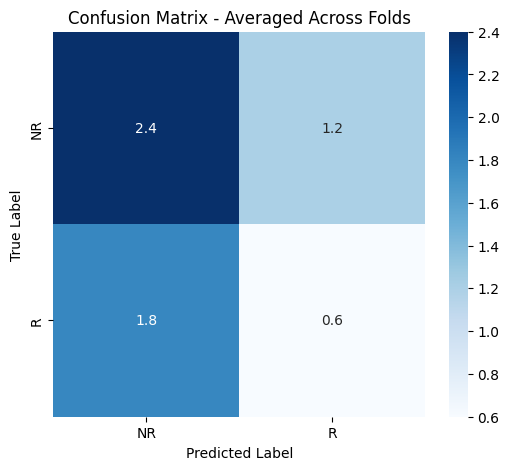

In [ ]:
from sklearn.model_selection import GroupShuffleSplit
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import accuracy_score, classification_report
import numpy as np
import pandas as pd

# Extract features (gene expression matrix) and labels (response)
X = adata_kymriah_baseline.X  # Gene expression matrix
y = adata_kymriah_baseline.obs['response'].astype(str)  # Convert response to string

# Get patient IDs (grouping variable for splitting)
patient_ids = adata_kymriah_baseline.obs['barcode']  # Ensure this column represents patient identity

# Initialize GroupShuffleSplit (ensures whole patients are in train OR test)
gss = GroupShuffleSplit(n_splits=5, test_size=0.4, random_state=42)  # 5 splits with 60:40 train-test split

# Initialize Logistic Regression model
clf = LogisticRegression(max_iter=1000, random_state=42)
accuracies = []
conf_matrices = []
# Loop through the splits and perform training and testing for each fold
for fold, (train_idx, test_idx) in enumerate(gss.split(X, y, groups=patient_ids), 1):
    # Get train and test data for this fold
    X_train, X_test = X[train_idx], X[test_idx]
    y_train, y_test = y.iloc[train_idx], y.iloc[test_idx]
    test_patients = patient_ids.iloc[test_idx]  # Get corresponding test set patients

    # Train Logistic Regression model
    clf.fit(X_train, y_train)

    # Predict on test set (cell-level predictions)
    y_pred = clf.predict(X_test)

    # Store predictions in a DataFrame
    test_df = pd.DataFrame({
        'barcode': test_patients.values,  # Match patient IDs
        'true_label': y_test.values,
        'pred_label': y_pred
    })

    # **Majority Vote Function to Determine the Predicted Label for Each Patient**
    def majority_vote(series):
        if series.empty:
            return np.nan  # Handle empty sequences gracefully
        return series.value_counts().idxmax()

    # Perform majority vote per patient (ignore empty patients)
    channel_predictions = test_df.groupby('barcode').agg({'pred_label': majority_vote, 'true_label': 'first'}).dropna()

    # Extract final labels per patient
    y_true_channel = channel_predictions['true_label']
    y_pred_channel = channel_predictions['pred_label']
    acc= accuracy_score(y_true_channel, y_pred_channel)
    accuracies.append(acc)
    conf_matrices.append(confusion_matrix(y_true_channel, y_pred_channel))

    # Compute patient-level accuracy for this fold
    print(f"Fold {fold} - Patient-level Accuracy:", accuracy_score(y_true_channel, y_pred_channel))

    # Compute classification report at the patient level for this fold
    print(f"Fold {fold} - Classification Report:")
    print(classification_report(y_true_channel, y_pred_channel))
# **Final Average Accuracy**
print(f"\nMean Accuracy across folds: {np.mean(accuracies):.4f} ± {np.std(accuracies):.4f}")

# **Aggregate Confusion Matrices**
final_conf_matrix = np.mean(conf_matrices, axis=0)

# **Plot Final Confusion Matrix**
plt.figure(figsize=(6, 5))
sns.heatmap(final_conf_matrix, annot=True, fmt=".1f", cmap="Blues",
            xticklabels=np.unique(y), yticklabels=np.unique(y))
plt.xlabel("Predicted Label")
plt.ylabel("True Label")
plt.title("Confusion Matrix - Averaged Across Folds")
plt.show()



In [ ]:
# Filter using query for 'Kymriah' product and 'Baseline' type
adata_Yescarta_Infusion = adata[adata.obs.query("product == 'Yescarta' and type == 'Infusion' and response !='nan'").index, :]


/usr/local/lib/python3.11/dist-packages/sklearn/base.py:474: FutureWarning: `BaseEstimator._validate_data` is deprecated in 1.6 and will be removed in 1.7. Use `sklearn.utils.validation.validate_data` instead. This function becomes public and is part of the scikit-learn developer API.
  # that has no feature names.
/usr/local/lib/python3.11/dist-packages/sklearn/base.py:474: FutureWarning: `BaseEstimator._validate_data` is deprecated in 1.6 and will be removed in 1.7. Use `sklearn.utils.validation.validate_data` instead. This function becomes public and is part of the scikit-learn developer API.
  # that has no feature names.


Accuracy: 0.7184
              precision    recall  f1-score   support

          NR       0.71      0.43      0.53      4854
           R       0.72      0.89      0.80      8070

    accuracy                           0.72     12924
   macro avg       0.71      0.66      0.67     12924
weighted avg       0.72      0.72      0.70     12924


Mean Accuracy across folds: 0.7184 ± 0.0000


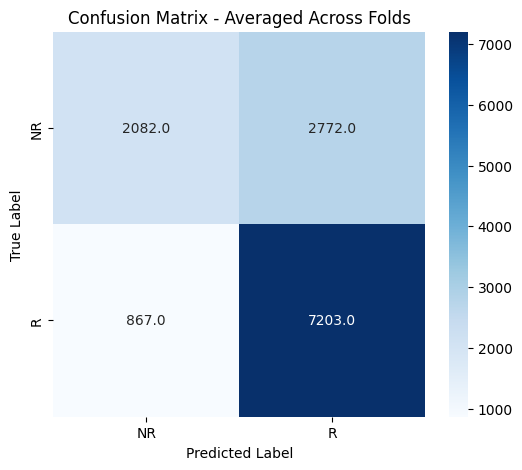

<ipython-input-30-8068540538fd>:58: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(x=label_encoder.classes_, y=class_accuracy, palette="Blues")


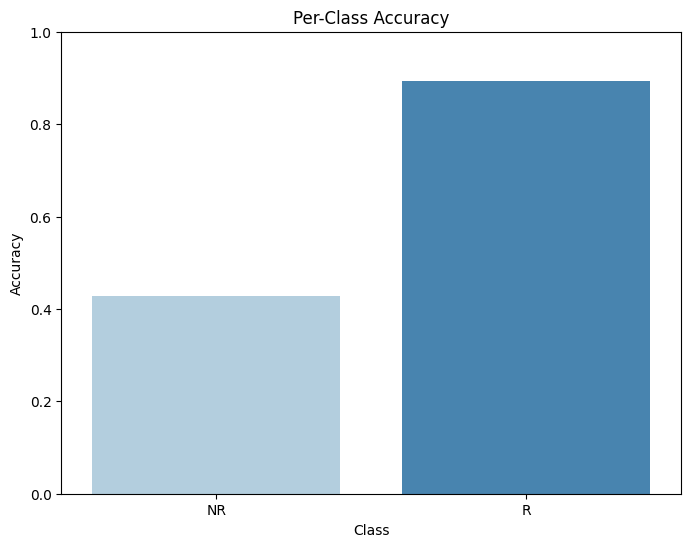

<ipython-input-30-8068540538fd>:82: FutureWarning: The default of observed=False is deprecated and will be changed to True in a future version of pandas. Pass observed=False to retain current behavior or observed=True to adopt the future default and silence this warning.
  channel_predictions = test_df.groupby('barcode').agg(majority_vote).dropna()


Patient-level Accuracy: 0.7142857142857143
              precision    recall  f1-score   support

          NR       1.00      0.33      0.50         3
           R       0.67      1.00      0.80         4

    accuracy                           0.71         7
   macro avg       0.83      0.67      0.65         7
weighted avg       0.81      0.71      0.67         7



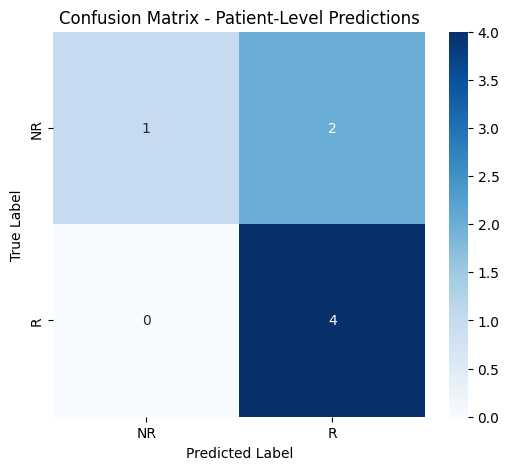

<ipython-input-30-8068540538fd>:109: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(x=label_encoder.classes_, y=class_accuracy, palette="Blues")


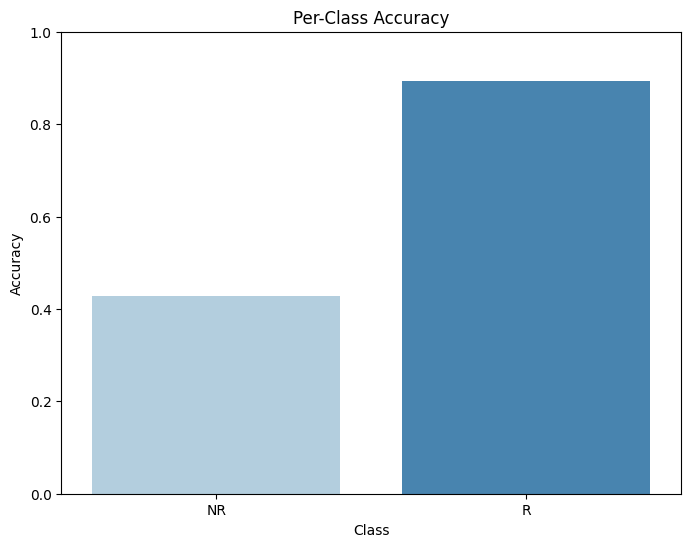

In [ ]:
from sklearn.model_selection import GroupShuffleSplit
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import accuracy_score, classification_report, confusion_matrix
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt

# Extract features (gene expression matrix) and labels (response)
X = adata_Yescarta_Infusion.X
y = adata_Yescarta_Infusion.obs['response'].astype(str)
patient_ids = adata_Yescarta_Infusion.obs['barcode']

# Initialize GroupShuffleSplit for Cross-Validation
gss = GroupShuffleSplit(n_splits=1, test_size=0.4, random_state=42)  # 5 folds, 60:40 split

accuracies = []
conf_matrices = []

for train_idx, test_idx in gss.split(X, y, groups=patient_ids):
    X_train, X_test = X[train_idx], X[test_idx]
    y_train, y_test = y.iloc[train_idx], y.iloc[test_idx]
    test_patients = patient_ids.iloc[test_idx]  # Get corresponding test set patients

    # Train Logistic Regression model
    clf = LogisticRegression(max_iter=1000, random_state=42)
    clf.fit(X_train, y_train)

    # Predict on test set
    y_pred = clf.predict(X_test)

    # Store results
    acc = accuracy_score(y_test, y_pred)
    accuracies.append(acc)
    conf_matrices.append(confusion_matrix(y_test, y_pred))

    print(f"Accuracy: {acc:.4f}")
    print(classification_report(y_test, y_pred))

# **Final Average Accuracy**
print(f"\nMean Accuracy across folds: {np.mean(accuracies):.4f} ± {np.std(accuracies):.4f}")

# **Aggregate Confusion Matrices**
final_conf_matrix = np.mean(conf_matrices, axis=0)

# **Plot Final Confusion Matrix**
plt.figure(figsize=(6, 5))
sns.heatmap(final_conf_matrix, annot=True, fmt=".1f", cmap="Blues",
            xticklabels=np.unique(y), yticklabels=np.unique(y))
plt.xlabel("Predicted Label")
plt.ylabel("True Label")
plt.title("Confusion Matrix - Averaged Across Folds")
plt.show()
# Per-class accuracy: Correct predictions / Total actual instances
class_accuracy = np.diag(final_conf_matrix) / final_conf_matrix.sum(axis=1)

# Plot per-class accuracy
plt.figure(figsize=(8, 6))
sns.barplot(x=label_encoder.classes_, y=class_accuracy, palette="Blues")
plt.ylim(0, 1)  # Accuracy is between 0 and 1
plt.ylabel("Accuracy")
plt.xlabel("Class")
plt.title("Per-Class Accuracy")
plt.show()

# Store predictions in a DataFrame
test_df = pd.DataFrame({
    'barcode': test_patients.values,  # Match patient IDs
    'true_label': y_test.values,
    'pred_label': y_pred
})

# **Aggregate predictions per patient using majority vote**
# channel_predictions = test_df.groupby('barcode').agg(lambda x: y_pred.value_counts().idxmax())
# Ensure we only compute majority voting for patients that actually have predictions
def majority_vote(series):
    if series.empty:
        return np.nan  # Handle empty sequences gracefully
    # Count occurrences of each label
    return series.value_counts().idxmax()

# Perform majority vote per patient (ignore empty patients)
channel_predictions = test_df.groupby('barcode').agg(majority_vote).dropna()

# Extract final labels per patient
y_true_channel = channel_predictions['true_label']
y_pred_channel = channel_predictions['pred_label']

# Compute accuracy at patient level
print("Patient-level Accuracy:", accuracy_score(y_true_channel, y_pred_channel))

# Compute classification report at patient level
print(classification_report(y_true_channel, y_pred_channel))

# **Confusion Matrix at Patient Level**
conf_matrix = confusion_matrix(y_true_channel, y_pred_channel)
plt.figure(figsize=(6, 5))
sns.heatmap(conf_matrix, annot=True, fmt='d', cmap='Blues',
            xticklabels=np.unique(y_true_channel),
            yticklabels=np.unique(y_pred_channel))
plt.xlabel("Predicted Label")
plt.ylabel("True Label")
plt.title("Confusion Matrix - Patient-Level Predictions")
plt.show()
# Per-class accuracy: Correct predictions / Total actual instances
class_accuracy = np.diag(final_conf_matrix) / final_conf_matrix.sum(axis=1)

# Plot per-class accuracy
plt.figure(figsize=(8, 6))
sns.barplot(x=label_encoder.classes_, y=class_accuracy, palette="Blues")
plt.ylim(0, 1)  # Accuracy is between 0 and 1
plt.ylabel("Accuracy")
plt.xlabel("Class")
plt.title("Per-Class Accuracy")
plt.show()
